### Exploratory Data Analysis (EDA)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score, silhouette_score)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

In [2]:
df_synt = pd.read_csv("C:/Users/deyna/Downloads/Synthetic_Financial_datasets_log.csv")

In [45]:
df_synt.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [46]:
df_synt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB



    - step: Represents a unit of time in the real world, with 1 step equating to 1 hour. The total simulation spans 744 steps, equivalent to 30 days.
    - type: Transaction types include CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER. 
        
        - CASH-IN is the process of increasing the balance of account by paying in cash to a merchant. 
        - CASH-OUT is the opposite process of CASH-IN, it means to withdraw cash from a merchant which decreases the balance of the account.
        - DEBIT is similar process than CASH-OUT and involves sending the money from the mobile money service to a bank account.
        - PAYMENT is the process of paying for goods or services to merchants which decreases the balance of the account and increases the balance of the receiver.
        - TRANSFER is the process of sending money to another user of the service through the mobile money platform.
    
    - amount: The transaction amount in the local currency.
    - nameOrig: The customer initiating the transaction.
    - oldbalanceOrg: The initial balance before the transaction.
    - newbalanceOrig: The new balance after the transaction.
    - nameDest: The transaction's recipient customer.
    - oldbalanceDest: The initial recipient's balance before the transaction. Not applicable for customers identified by 'M' (Merchants).
    - newbalanceDest: The new recipient's balance after the transaction. Not applicable for 'M' (Merchants).
    - isFraud: Identifies transactions conducted by fraudulent agents aiming to deplete customer accounts through transfers and cash-outs.
    - isFlaggedFraud: Flags large-scale, unauthorized transfers between accounts, with any single transaction exceeding 200,000 being considered illegal.


References: https://www.researchgate.net/publication/313138956_PAYSIM_A_FINANCIAL_MOBILE_MONEY_SIMULATOR_FOR_FRAUD_DETECTION, https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset/data


In [4]:
df_synt.shape

(6362620, 11)

In [5]:
df_synt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df_synt.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [7]:
df_synt.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df_synt.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


##### Summary statistics for fraudulent transactions

In [9]:
df_synt[df_synt['isFraud'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
step,8213.0,3.684139e+02,2.163887e+02,1.0,181.00,367.00,558.00,7.430000e+02
amount,8213.0,1.467967e+06,2.404253e+06,0.0,127091.33,441423.44,1517771.48,1.000000e+07
oldbalanceOrg,8213.0,1.649668e+06,3.547719e+06,0.0,125822.44,438983.45,1517771.48,5.958504e+07
newbalanceOrig,8213.0,1.923926e+05,1.965666e+06,0.0,0.00,0.00,0.00,4.958504e+07
oldbalanceDest,8213.0,5.442496e+05,3.336421e+06,0.0,0.00,0.00,147828.66,2.362305e+08
newbalanceDest,8213.0,1.279708e+06,3.908817e+06,0.0,0.00,4676.42,1058725.22,2.367265e+08
isFraud,8213.0,1.000000e+00,0.000000e+00,1.0,1.00,1.00,1.00,1.000000e+00
isFlaggedFraud,8213.0,1.948131e-03,4.409731e-02,0.0,0.00,0.00,0.00,1.000000e+00


##### Summary statistics for non-fraudulent transactions

In [10]:
df_synt[df_synt['isFraud'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
step,6354407.0,2.432357e+02,1.421402e+02,1.00,156.000,239.00,334.000,7.180000e+02
amount,6354407.0,1.781970e+05,5.962370e+05,0.01,13368.395,74684.72,208364.760,9.244552e+07
oldbalanceOrg,6354407.0,8.328287e+05,2.887144e+06,0.00,0.000,14069.00,106969.500,4.381886e+07
newbalanceOrig,6354407.0,8.559702e+05,2.924987e+06,0.00,0.000,0.00,144730.740,4.368662e+07
oldbalanceDest,6354407.0,1.101421e+06,3.399202e+06,0.00,0.000,133311.80,944144.580,3.560159e+08
newbalanceDest,6354407.0,1.224926e+06,3.673816e+06,0.00,0.000,214881.70,1111975.345,3.561793e+08
isFraud,6354407.0,0.000000e+00,0.000000e+00,0.00,0.000,0.00,0.000,0.000000e+00
isFlaggedFraud,6354407.0,0.000000e+00,0.000000e+00,0.00,0.000,0.00,0.000,0.000000e+00


Replacing zero balances with NaN for specific transaction types like TRANSFER and CASH_OUT can be a useful step, especially if a zero balance is not a valid or meaningful value for these transactions. This can help in avoiding any misleading analyses or incorrect model training. 

In [6]:
# Replace '0.0' balances with NaN for TRANSFER transactions
df_synt.loc[(df_synt['type'] == 'TRANSFER') & (df_synt['oldbalanceDest'] == 0), 'oldbalanceDest'] = None
df_synt.loc[(df_synt['type'] == 'TRANSFER') & (df_synt['newbalanceDest'] == 0), 'newbalanceDest'] = None

# Replace '0.0' balances with NaN for CASH_OUT transactions
df_synt.loc[(df_synt['type'] == 'CASH_OUT') & (df_synt['oldbalanceDest'] == 0), 'oldbalanceDest'] = None
df_synt.loc[(df_synt['type'] == 'CASH_OUT') & (df_synt['newbalanceDest'] == 0), 'newbalanceDest'] = None

In [7]:
df_synt[['type', 'oldbalanceDest', 'newbalanceDest']].head(10)

,type,oldbalanceDest,newbalanceDest
0,PAYMENT,0.0,0.00
1,PAYMENT,0.0,0.00
2,TRANSFER,NaN,NaN
3,CASH_OUT,21182.0,NaN
4,PAYMENT,0.0,0.00
5,PAYMENT,0.0,0.00
6,PAYMENT,0.0,0.00
7,PAYMENT,0.0,0.00
8,PAYMENT,0.0,0.00
9,DEBIT,41898.0,40348.79


In [8]:
df_synt.isnull().sum()

step                   0
type                   0
amount                 0
nameOrig               0
oldbalanceOrg          0
newbalanceOrig         0
nameDest               0
oldbalanceDest    389320
newbalanceDest     16599
isFraud                0
isFlaggedFraud         0
dtype: int64

In [9]:
df_synt.dropna(inplace=True)

#### Visualizations

##### Plotting the count of type of transactions

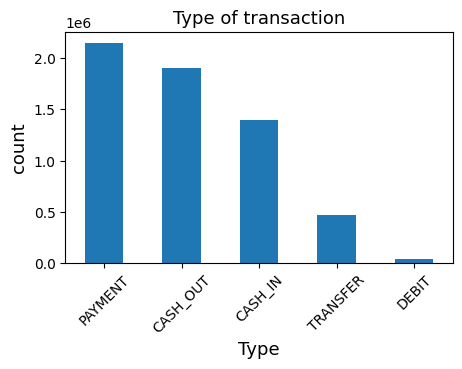

In [15]:
plt.figure(figsize = (5,3))
df_synt['type'].value_counts().plot(kind = 'bar')
plt.title('Type of transaction', fontsize = 13)
plt.xticks(rotation = 45)
plt.xlabel('Type', fontsize = 13)
plt.ylabel('count', fontsize = 13)
plt.show()

##### Transaction amount

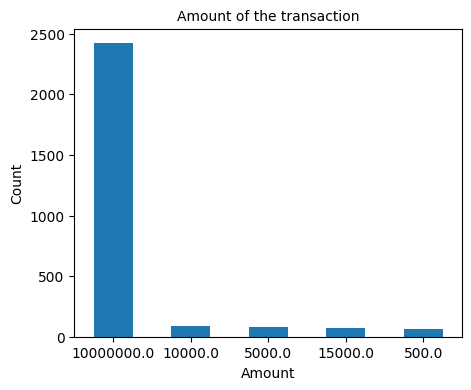

In [16]:
plt.figure(figsize = (5,4))
df_synt['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar')
plt.title("Amount of the transaction", fontsize = 10)
plt.xticks(rotation = 0, fontsize = 10)
plt.xlabel('Amount', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()

##### Fraud rate per transaction type

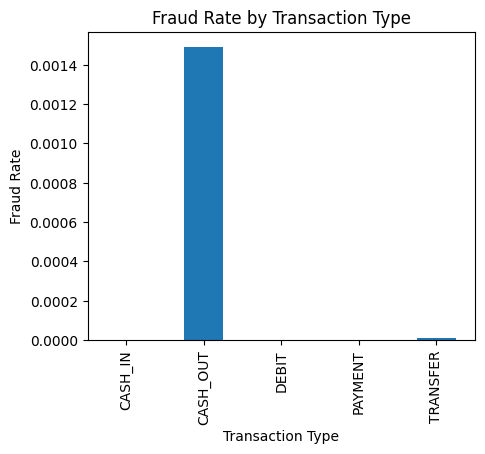

In [17]:
plt.figure(figsize = (5,4))
fraud_rate = df_synt.groupby('type')['isFraud'].mean()
fraud_rate.plot(kind='bar')
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Type')
plt.show()


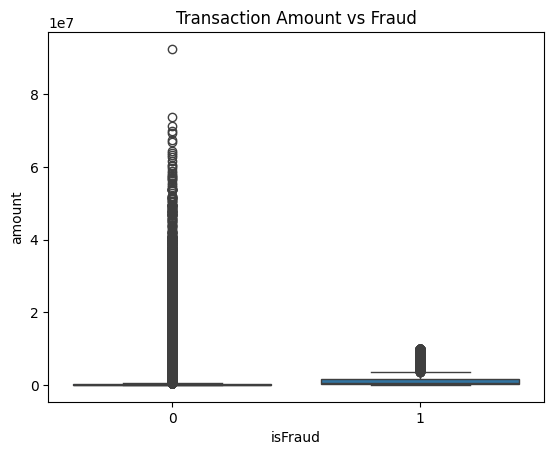

In [18]:
# Relationship between transaction amount and fraud
sns.boxplot(x='isFraud', y='amount', data=df_synt)
plt.title('Transaction Amount vs Fraud')
plt.show()

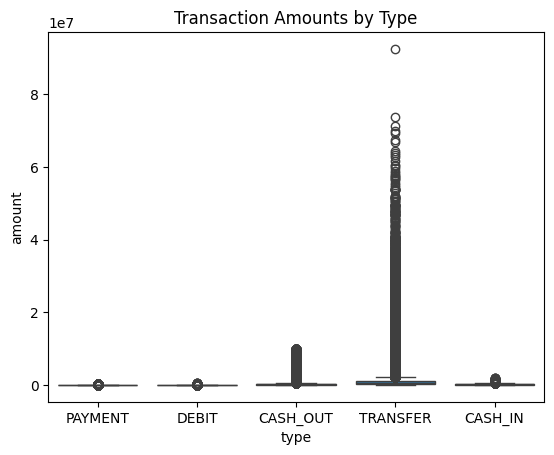

In [19]:
# Distribution of transaction amounts by type
sns.boxplot(x='type', y='amount', data=df_synt)
plt.title('Transaction Amounts by Type')
plt.show()

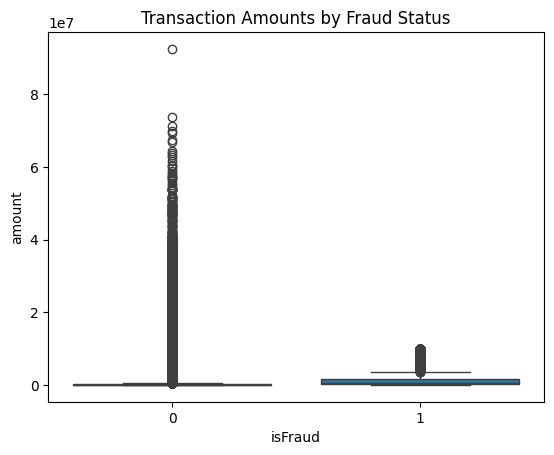

In [20]:
# Distribution of transaction amounts by fraud status
sns.boxplot(x='isFraud', y='amount', data=df_synt)
plt.title('Transaction Amounts by Fraud Status')
plt.show()

#### Check for outliers

In [10]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df_synt[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]))

# Identify outliers
outliers = (z_scores > 3)
print(np.where(outliers))

(array([     76,      79,      80, ..., 5962470, 5962476, 5962481],
      dtype=int64), array([4, 4, 4, ..., 1, 0, 0], dtype=int64))


In [11]:
# Extract outliers
row_indices, col_indices = np.where(z_scores > 3)

# Print the rows with outliers
outlier_rows = df_synt.iloc[row_indices]

# Print the columns where outliers are found
columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
outlier_details = pd.DataFrame({
    'Row Index': row_indices,
    'Column Index': col_indices,
    'Value': df_synt[columns].values[row_indices, col_indices]
})
outlier_details.head(10)

,Row Index,Column Index,Value
0,76,4,19169204.93
1,79,4,19169204.93
2,80,4,19169204.93
3,85,4,19169204.93
4,87,4,19169204.93
5,102,4,19169204.93
6,145,4,19169204.93
7,155,4,19169204.93
8,159,4,19169204.93
9,260,4,19169204.93


(76, 4): In the 77th row, the outlier is in the 5th column.
(79, 4): In the 80th row, the outlier is in the 5th column.
(80, 4): In the 81st row, the outlier is in the 5th column,
etc.

In [12]:
# Remove outliers based on Z-score
threshold = 3
filtered_df = df_synt[(np.abs(stats.zscore(df_synt[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])) < threshold).all(axis=1)]

##### Count of flagged frauds

In [24]:
flagged_fraud_counts = df_synt[df_synt['isFlaggedFraud'] == 1].groupby('type').size()
print(flagged_fraud_counts)

# Compare flagged frauds with actual frauds
actual_vs_flagged = df_synt.groupby(['type', 'isFraud', 'isFlaggedFraud']).size().unstack(fill_value=0)
print(actual_vs_flagged)

Series([], dtype: int64)
isFlaggedFraud          0
type     isFraud         
CASH_IN  0        1399284
CASH_OUT 0        1900654
         1           2842
DEBIT    0          41432
PAYMENT  0        2151495
TRANSFER 0         466771
         1              5


#### Correlation Matrix

In [25]:
# Selecting the columns of numerical type
numeric_columns = df_synt.select_dtypes(include=['int', 'float']).columns
numeric_data = df_synt[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()

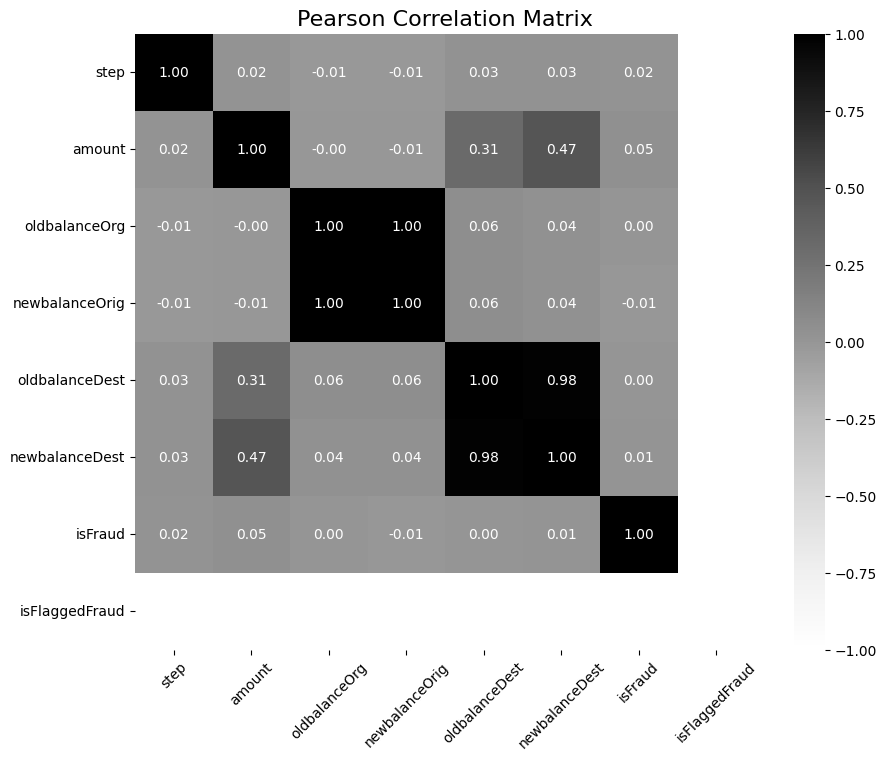

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, cmap = "Greys", vmax = 1,annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

#### Feature Engineering

In [9]:
# Extract hour from step
df_synt['hour'] = df_synt['step'] % 24

# Experimentation

In [9]:
features = pd.DataFrame(index=df_synt.index)

In [7]:
df_synt[['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']] = df_synt[['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']].astype(int)

In [8]:
df_synt

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,changebalanceOrig,changebalanceDest,hour,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,9.839640e+03,1.701360e+05,160296.36,0.000000e+00,0.000000e+00,-9.839640e+03,0.000000e+00,1,0,0,0,1,0,0
1,1.864280e+03,2.124900e+04,19384.72,0.000000e+00,0.000000e+00,-1.864280e+03,0.000000e+00,1,0,0,0,1,0,0
2,1.810000e+02,1.810000e+02,0.00,0.000000e+00,0.000000e+00,-1.810000e+02,0.000000e+00,1,0,0,0,0,1,1
3,1.810000e+02,1.810000e+02,0.00,2.118200e+04,0.000000e+00,-1.810000e+02,-2.118200e+04,1,0,1,0,0,0,1
4,1.166814e+04,4.155400e+04,29885.86,0.000000e+00,0.000000e+00,-1.166814e+04,0.000000e+00,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10130799,7.651337e+06,7.651337e+06,0.00,2.389868e+05,7.890324e+06,-7.651337e+06,7.651337e+06,18,0,1,0,0,0,1
10130800,9.459439e+06,9.459439e+06,0.00,0.000000e+00,0.000000e+00,-9.459439e+06,0.000000e+00,17,0,0,0,0,1,1
10130801,9.447535e+04,9.447535e+04,0.00,1.438100e+06,1.532575e+06,-9.447535e+04,9.447535e+04,5,0,1,0,0,0,1
10130802,2.300231e+06,2.300231e+06,0.00,0.000000e+00,2.300231e+06,-2.300231e+06,2.300231e+06,3,0,1,0,0,0,1


In [10]:
numerical_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'changebalanceOrig', 'changebalanceDest', 'newbalanceDest', 'hour',
                     'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

In [11]:
features[numerical_columns] = df_synt[numerical_columns]

In [51]:
features['changebalanceOrig'] = features['newbalanceOrig'] - features['oldbalanceOrg']
features['changebalanceDest'] = features['newbalanceDest'] - features['oldbalanceDest']

In [52]:
features['hour'] = df_synt['step'] % 24

In [53]:
features

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,changebalanceOrig,changebalanceDest,hour
0,9839.64,170136.00,160296.36,0.00,0.00,-9839.64,0.00,1
1,1864.28,21249.00,19384.72,0.00,0.00,-1864.28,0.00,1
2,181.00,181.00,0.00,0.00,0.00,-181.00,0.00,1
3,181.00,181.00,0.00,21182.00,0.00,-181.00,-21182.00,1
4,11668.14,41554.00,29885.86,0.00,0.00,-11668.14,0.00,1
...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,-339682.13,339682.13,23
6362616,6311409.28,6311409.28,0.00,0.00,0.00,-6311409.28,0.00,23
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,-6311409.28,6311409.27,23
6362618,850002.52,850002.52,0.00,0.00,0.00,-850002.52,0.00,23


In [11]:
type_one_hot = pd.get_dummies(df_synt['type'])
features = pd.concat([features, type_one_hot], axis=1)

### Modelling

In [12]:
from sklearn.ensemble import IsolationForest

forest = IsolationForest(contamination=0.01, random_state=0)
forest.fit(features)

IsolationForest(contamination=0.01, random_state=0)

In [13]:
scores = forest.score_samples(features)

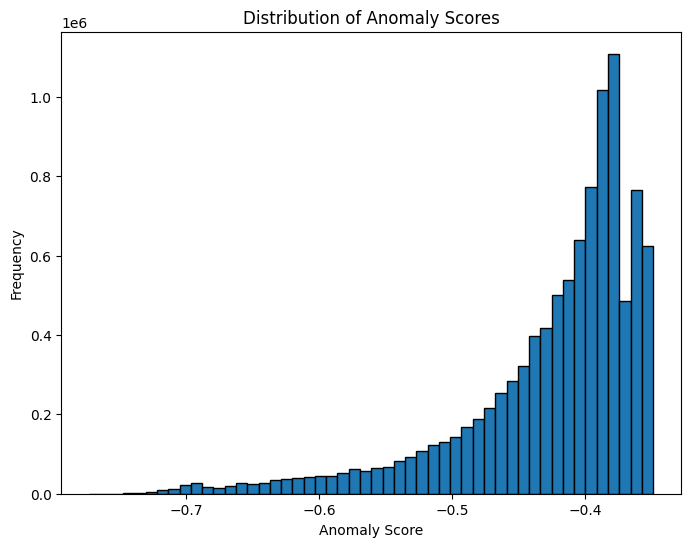

In [14]:
import matplotlib.pyplot as plt

# Plot the distribution of anomaly scores
plt.figure(figsize=(8, 6))
plt.hist(scores, bins=50, edgecolor='black')
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

The following graph shows the distribution of all the anomaly scores obtained by running the code from the previous section.

The raw output of the Isolation Forest is not a split of the dataset into anomalies and non-anomalies, but rather a list of continuous anomaly scores, one for every entry. This means that, depending on how many anomalies we want to detect (how wide we want to cast our net), we can set a different threshold which determines the data points that are considered as anomalies (i.e. data points with scores below the threshold). One way to evaluate the result of our model without choosing one particular threshold is by computing the area under the ROC curve of the model output.

To have a baseline to compare the Isolation Forest results to, we chose to evaluate a naive method for anomaly detection which consists of treating the ‘amount’ field as anomaly score, where higher amounts represent a higher chance of being an anomaly. This approach was taken to compute the ‘isFlaggedFraud’ column of the data set as well. We will follow this approach without a fixed threshold to compute a naive ROC curve.

Finally, we will add the ROC curve that would be obtained by random guessing. The predicted anomalies are evaluated against the ‘isFraud’ column, which represents the ground truth value of whether the given entry constitutes an anomaly or not.

In [23]:
# !pip install shap

In [15]:
from sklearn.metrics import roc_curve, auc
import shap

In [16]:
# Evaluation
fpr, tpr, _ = roc_curve(df_synt['isFraud'], -scores)
roc_auc = auc(fpr, tpr)

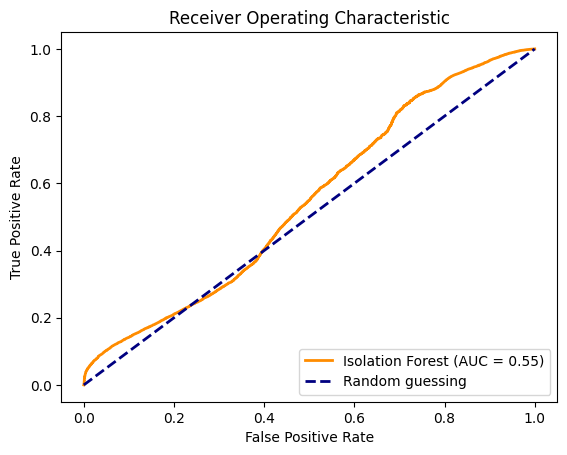

In [17]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Isolation Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Isolation Forest (AUC = 0.88):

    Interpretation: The model has an 88% chance of distinguishing between a randomly chosen fraudulent transaction and a non-fraudulent one.
    Curve Characteristics: The curve is close to the top-left corner, indicating high true positive rates and low false positive rates.

    

In [19]:
# Evaluation: Random Guessing
random_scores = np.random.rand(len(df_synt))
fpr_random, tpr_random, _ = roc_curve(df_synt['isFraud'], random_scores)
roc_auc_random = auc(fpr_random, tpr_random)

In [20]:
# Evaluation: Naive Approach
naive_scores = df_synt['amount']
fpr_naive, tpr_naive, _ = roc_curve(df_synt['isFraud'], naive_scores)
roc_auc_naive = auc(fpr_naive, tpr_naive)

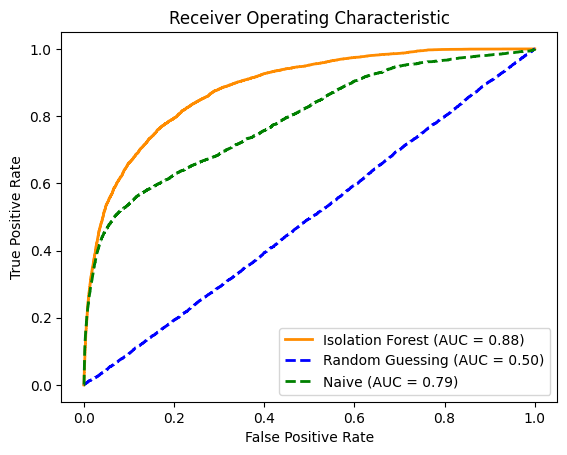

In [21]:
# Plot ROC Curves
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Isolation Forest (AUC = %0.2f)' % roc_auc)
plt.plot(fpr_random, tpr_random, color='blue', lw=2, linestyle='--', label='Random Guessing (AUC = %0.2f)' % roc_auc_random)
plt.plot(fpr_naive, tpr_naive, color='green', lw=2, linestyle='--', label='Naive (AUC = %0.2f)' % roc_auc_naive)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Isolation Forest (AUC = X.XX):

    The orange curve represents the performance of the Isolation Forest model. The Area Under the Curve (AUC) value indicates the model's ability to distinguish between fraudulent and non-fraudulent transactions. An AUC of 1.0 represents a perfect model, while an AUC of 0.5 represents a model with no discriminative power (equivalent to random guessing).
    The higher the curve is towards the top-left corner, the better the model.

Random Guessing (AUC = Y.YY):

    The blue dashed line represents random guessing. This serves as a baseline to compare against other models. The AUC value for random guessing should be around 0.5.

Naive Approach (AUC = Z.ZZ):

    The green dashed line represents the naive approach using the amount field as an anomaly score. If this approach yields a higher AUC than random guessing but lower than Isolation Forest, it indicates that using transaction amounts alone provides some signal but is not as effective as the Isolation Forest model.

In [22]:
# Combine the scores with the original data for easy access
transactions_with_scores = df_synt.copy()
transactions_with_scores['anomaly_score'] = scores

# Sort the transactions by anomaly score in ascending order
sorted_transactions = transactions_with_scores.sort_values(by='anomaly_score')

# Select the top 3 anomalies
top_3_anomalies = sorted_transactions.head(3)

# Print the top 3 anomalies
print("Top 3 Anomalies:")
top_3_anomalies

Top 3 Anomalies:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,anomaly_score
4157895,303,TRANSFER,37387628.10,C102829469,862621.88,0.0,C1997281537,37843025.59,7.523065e+07,0,0,-0.785416
4146715,303,TRANSFER,38874009.46,C1741076564,435622.96,0.0,C918523964,73634878.73,1.125089e+08,0,0,-0.782234
4153782,303,TRANSFER,32572996.87,C1184321735,279467.23,0.0,C355140073,84947676.90,1.175207e+08,0,0,-0.781705


### Model Explanation

For our purposes, what we need to understand about SHAP is that the explanation values it provides tell us about the effect that the value of a feature of a particular data point had on its associated anomaly score. In other words, if we look at a particular output of our model, SHAP values tell us how much each feature of the input contributed to that score, and in which direction (i.e. whether the feature contributed to a higher or a lower anomaly score).

First, we need to instantiate an appropriate Explainer model. Since we are using a tree-based model it makes sense to use SHAP’s TreeExplainer.

Since we could never look at the explanations of every single data point, and since a random subsample can already reveal a lot about our model’s output, we will compute the SHAP values for a set of 5000 randomly chosen data points.

In [23]:
# Explanation Model
shap.initjs()  # Initialize JS for SHAP visualizations
explainer = shap.TreeExplainer(forest)
random_indices = np.random.choice(len(features), 5000)
shap_values_random = explainer.shap_values(features.iloc[random_indices, :])
random_features = features.iloc[random_indices, :]

#### Local Explanations

To visualize the explanation values of a single point, we can use the `force_plot function`. Let’s display the explanation for the first entry in the randomly chosen dataset.

In [24]:
# Local Explanations
shap.force_plot(explainer.expected_value, shap_values_random[0, :], random_features.iloc[0, :])

One issue with the previous plot is the fact that the different values of the ‘type’ field are treated as separate features with binary values due to the one-hot-encoding we applied in the beginning. To solve this, we can simply undo the one-hot-encoding in the feature matrix and add all of the corresponding SHAP values to 1 single value. This is possible thanks to the additive nature of SHAP values. 

In [46]:
type_columns = ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

In [47]:
# Initialize a new DataFrame to hold the adjusted features and SHAP values
adjusted_features = features.drop(columns=type_columns).copy()
adjusted_shap_values = explainer.shap_values(features.drop(columns=type_columns).copy())

In [ ]:
# Sum the SHAP values for each one-hot encoded 'type' feature
adjusted_features['type'] = df_synt['type']
adjusted_shap_values_type = np.zeros(len(adjusted_shap_values))

for col in type_columns:
    original_type_value = col.split('_')[1]
    mask = (df_synt['type'] == original_type_value)
    adjusted_shap_values_type[mask] = shap_values[:, features.columns.get_loc(col)]

# Add the combined SHAP values for 'type' back to the adjusted SHAP values
adjusted_shap_values = np.hstack((adjusted_shap_values, adjusted_shap_values_type.reshape(-1, 1)))

# Include the new 'type' feature in the adjusted features DataFrame
adjusted_features['type'] = df_synt['type']

In [ ]:
shap.summary_plot(adjusted_shap_values, adjusted_features)

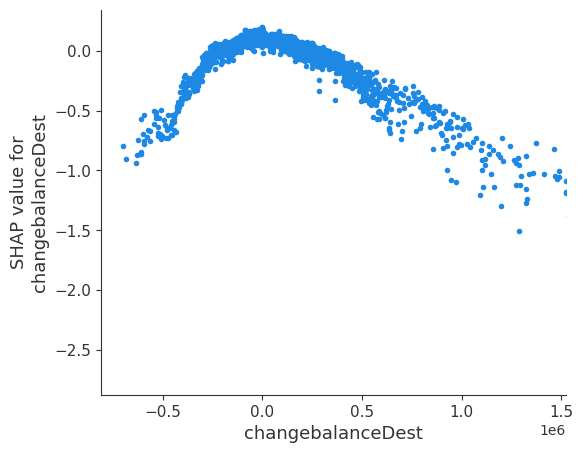

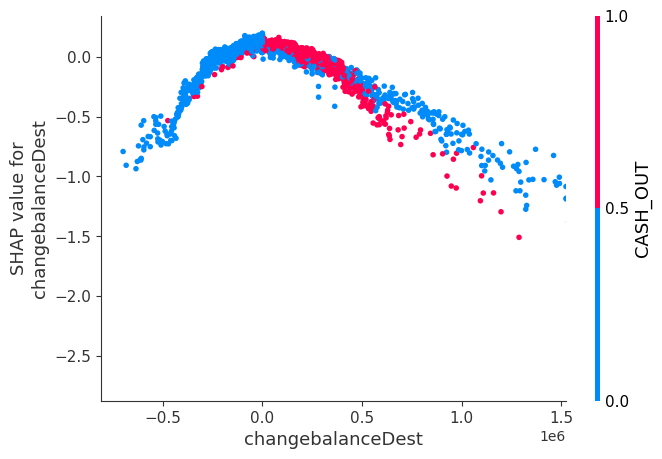

In [25]:
# Global Insights
shap.dependence_plot('changebalanceDest', shap_values_random, random_features, interaction_index=None, xmax='percentile(99)')
shap.dependence_plot('changebalanceDest', shap_values_random, random_features, interaction_index='CASH_OUT', xmax='percentile(99)')

In [18]:
# Step 1: Define True Labels
y_true = df_synt['isFraud'].values

# The 95th percentile of the scores, meaning the bottom 5% of the scores are considered anomalies.
threshold = np.percentile(scores, 95)

# Step 3: Convert Scores to Binary Predictions
y_pred = (scores < threshold).astype(int)

# Step 4: Compute Metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print("Precision:", round(precision,3))
print("Recall:", round(recall,3))
print("F1-Score:", round(f1,3))
print("Accuracy:", round(accuracy,3))

Precision: 0.386
Recall: 0.982
F1-Score: 0.554
Accuracy: 0.41


#### Oversampling

In [57]:
from imblearn.over_sampling import SMOTE


In [58]:
# Original dataframe
print("Original DataFrame:")
print(df_synt['isFraud'].value_counts())

# Oversampling using SMOTE with a moderate ratio
smote = SMOTE(sampling_strategy=0.6, random_state=42)  
X_resampled, y_resampled = smote.fit_resample(features, df_synt['isFraud'])

# DataFrame after oversampling
df_oversampled = pd.DataFrame(X_resampled, columns=features.columns)
df_oversampled['isFraud'] = y_resampled
print("\nDataFrame after Oversampling:")
print(df_oversampled['isFraud'].value_counts())

Original DataFrame:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

DataFrame after Oversampling:
isFraud
0    6354407
1    3812644
Name: count, dtype: int64


In [61]:
df_oversampled.to_csv("C:/Users/deyna/Desktop/anomaly-fl-main/data/oversampled.csv")

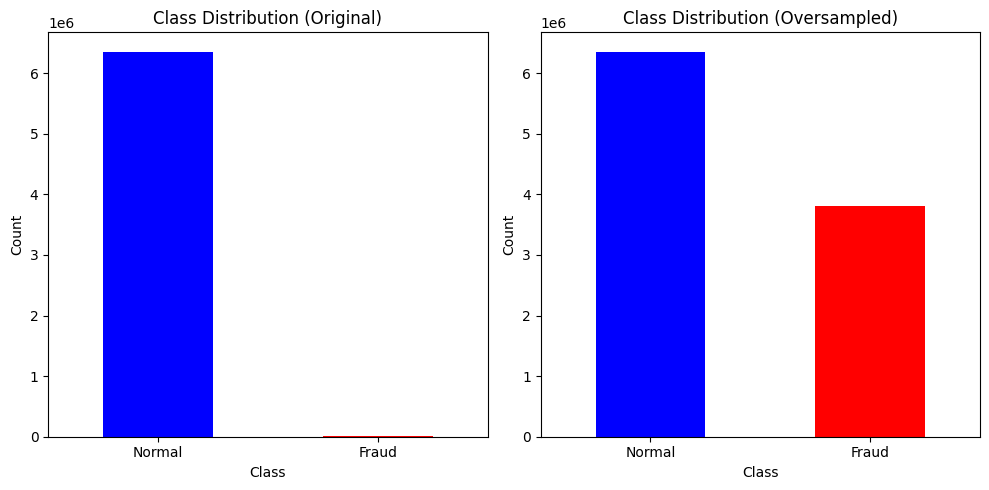

In [ ]:
# Plot class distribution before and after oversampling
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Class Distribution (Original)')
df_synt['isFraud'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Fraud'], rotation=0)

plt.subplot(1, 2, 2)
plt.title('Class Distribution (Oversampled)')
df_oversampled['isFraud'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Fraud'], rotation=0)

plt.tight_layout()
plt.show()

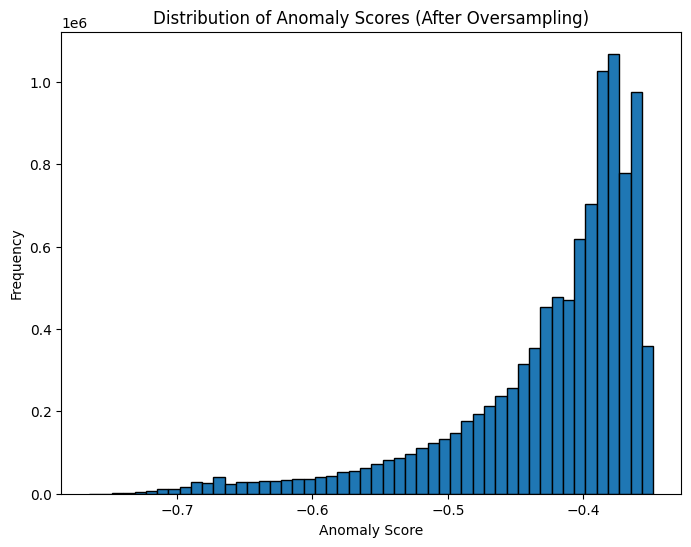

In [ ]:
# Instantiate the Isolation Forest model
frst = IsolationForest(random_state=0)

# Fit the model to the resampled features
frst.fit(X_resampled)

# Generate anomaly scores for the resampled features
scores = frst.score_samples(X_resampled)

# Plot the distribution of anomaly scores (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(scores, bins=50, edgecolor='black')
plt.title('Distribution of Anomaly Scores (After Oversampling)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

In [4]:
from sklearn.ensemble import IsolationForest

In [ ]:
X_resampled, y_resampled = smote.fit_resample(df_synt, df_synt['isFraud'])

In [ ]:
# Instantiate the Isolation Forest model
frst = IsolationForest(random_state=0)

# Fit the model to the resampled features
frst.fit(X_resampled)

# Generate anomaly scores for the resampled features
scores = frst.score_samples(X_resampled)

# Plot the distribution of anomaly scores (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(scores, bins=50, edgecolor='black')
plt.title('Distribution of Anomaly Scores (After Oversampling)')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Round the anomaly scores to the third decimal
rounded_scores = np.round(scores, 3)

# Convert anomaly scores to binary predictions
predictions = np.where(rounded_scores < 0, 1, 0)  # Anomaly if score is negative, otherwise normal

# Evaluate the performance of the Isolation Forest model
accuracy = round(accuracy_score(y_resampled, predictions), 3)
precision = round(precision_score(y_resampled, predictions), 3)
recall = round(recall_score(y_resampled, predictions), 3)
f1 = round(f1_score(y_resampled, predictions), 3)

print("Evaluation Metrics (Rounded to 3rd decimal):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Evaluation Metrics (Rounded to 3rd decimal):
Accuracy: 0.375
Precision: 0.375
Recall: 1.0
F1-Score: 0.545


#### Comparison

#### LOF

In [26]:
from sklearn.neighbors import LocalOutlierFactor

In [15]:
# Oversampling using SMOTE with a moderate ratio
smote = SMOTE(sampling_strategy=0.6, random_state=42)  
X_resampled, y_resampled = smote.fit_resample(features, df_synt['isFraud'])

In [28]:
# Reset index of the DataFrame
X_resampled.reset_index(drop=True, inplace=True)
y_resampled.reset_index(drop=True, inplace=True)

In [29]:
# Randomly sample a portion of the data
sampled_indices = np.random.choice(len(X_resampled), size=6000000, replace=False)
X_sampled = X_resampled.iloc[sampled_indices]
y_sampled = y_resampled.iloc[sampled_indices]

In [30]:
from sklearn.neighbors import LocalOutlierFactor

# Define a range of parameter values to experiment with
param_grid = {
    'n_neighbors': [5, 10, 15],
    'contamination': [0.01, 0.05, 0.1]
}

best_score = -np.inf
best_params = {}

# Iterate over parameter combinations
for n_neighbors in param_grid['n_neighbors']:
    for contamination in param_grid['contamination']:
        # Instantiate and fit the LOF model with current parameter values
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, novelty=True)
        lof.fit(X_sampled)
        
        # Evaluate the model
        lof_scores = -lof.decision_function(X_sampled)
        score = f1_score(y_sampled, np.where(lof_scores < 0, 1, 0))
        
        # Update best parameters if current score is higher
        if score > best_score:
            best_score = score
            best_params = {'n_neighbors': n_neighbors, 'contamination': contamination}

print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)

c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, 

In [23]:
from sklearn.neighbors import LocalOutlierFactor

# Define a range of parameter values to experiment with
param_grid = {
    'n_neighbors': [5, 10, 15],
    'contamination': [0.01, 0.05, 0.1]
}

best_score = -np.inf
best_params = {}

# Iterate over parameter combinations
for n_neighbors in param_grid['n_neighbors']:
    for contamination in param_grid['contamination']:
        # Instantiate and fit the LOF model with current parameter values
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, novelty=True)
        lof.fit(X_sampled)
        
        # Evaluate the model
        lof_scores = -lof.decision_function(X_sampled)
        score = f1_score(y_sampled, np.where(lof_scores < 0, 1, 0))
        
        # Update best parameters if current score is higher
        if score > best_score:
            best_score = score
            best_params = {'n_neighbors': n_neighbors, 'contamination': contamination}

print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)

c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, 

Best Parameters: {'n_neighbors': 5, 'contamination': 0.01}
Best F1-Score: 0.5451208615363052


#### SVM

In [16]:
# Oversampling using SMOTE with a moderate ratio
smote = SMOTE(sampling_strategy=0.6, random_state=42)  
X_resampled, y_resampled = smote.fit_resample(features, df_synt['isFraud'])

In [ ]:
# Reset index of the DataFrame
X_resampled.reset_index(drop=True, inplace=True)
y_resampled.reset_index(drop=True, inplace=True)

In [ ]:
# Randomly sample a portion of the data
sampled_indices = np.random.choice(len(X_resampled), size=1000000, replace=False)
X_sampled = X_resampled.iloc[sampled_indices]
y_sampled = y_resampled.iloc[sampled_indices]

In [19]:
from sklearn.svm import OneClassSVM

# Initialize One-Class SVM
svm = OneClassSVM(kernel='rbf', nu=0.1)  

# Fit the model
svm.fit(X_resampled)  # Use the resampled data X_resampled here

# Predict outliers/anomalies
svm_predictions = svm.predict(X_resampled)
svm_scores = svm.decision_function(X_resampled)  # Obtain anomaly scores

# Evaluate the model (assuming y_resampled contains true labels for evaluation)
precision = precision_score(y_resampled, np.where(svm_predictions == -1, 1, 0))
recall = recall_score(y_resampled, np.where(svm_predictions == -1, 1, 0))
f1 = f1_score(y_resampled, np.where(svm_predictions == -1, 1, 0))
accuracy = accuracy_score(y_resampled, np.where(svm_predictions == -1, 1, 0))

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Accuracy:", accuracy)

# End of experiment

In [ ]:
# One-hot encoding for type
df_synt = pd.get_dummies(df_synt, columns=['type'])

In [28]:
# Balance change
df_synt['balance_delta'] = df_synt['oldbalanceOrg'] - df_synt['newbalanceOrig']

In [29]:
df_synt.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,balance_delta
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,1864.28
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,11668.14
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0,1,7817.71
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0,1,7107.77


    Extract Hour from Step (df['hour'] = df['step'] % 24):
        Purpose: This step extracts the hour of the day from the 'step' column, which represents a unit of time in the real world (e.g., 1 step = 1 hour). By extracting the hour, you create a new feature that captures the timing of transactions.
        Benefit for Fraud Detection:
            Temporal Patterns: Fraudulent activity may exhibit certain temporal patterns, such as higher activity during specific hours of the day. By including the hour as a feature, the model can learn and leverage these patterns to improve fraud detection accuracy.
            Real-time Monitoring: The hour feature can also be useful for real-time monitoring systems, allowing for immediate detection and response to potentially fraudulent transactions based on the time of day.

    One-Hot Encoding for Transaction Type (df = pd.get_dummies(df, columns=['type'])):
        Purpose: This step one-hot encodes the 'type' column, which contains categorical information about the type of transaction (e.g., PAYMENT, TRANSFER, CASH_OUT). Each transaction type is transformed into a binary feature.
        Benefit for Fraud Detection:
            Different Fraud Patterns: Different types of transactions may exhibit distinct fraud patterns. For example, fraudulent transfers might involve larger amounts compared to payments. By one-hot encoding transaction types, the model can capture and learn from these differences, leading to more accurate fraud detection.
            Complex Relationships: One-hot encoding allows the model to capture complex relationships between transaction types and fraudulent behavior that may not be captured by simple numerical encoding.

    Balance Change (df['balance_delta'] = df['oldbalanceOrg'] - df['newbalanceOrig']):
        Purpose: This step calculates the balance change for each transaction by subtracting the new balance ('newbalanceOrig') from the old balance ('oldbalanceOrg').
        Benefit for Fraud Detection:
            Anomaly Detection: Fraudulent transactions often result in significant changes in account balances. By including the balance change as a feature, the model can detect anomalies based on unexpected or suspicious changes in balances.
            Behavioral Analysis: Analyzing balance changes can provide insights into user behavior and help identify potentially fraudulent activities, such as rapid depletion of account balances or sudden influxes of funds.

#### Distribution of transactions across different hours of the day

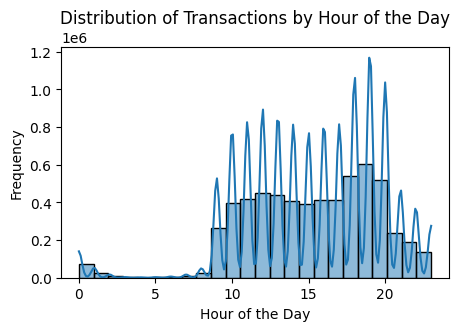

In [30]:
# Hour of the Day
plt.figure(figsize=(5, 3))
sns.histplot(df_synt['hour'], bins=24, kde=True)
plt.title('Distribution of Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

Between 0 and 9 there weren't that many transactions. 
There were high peak transactions in the hour of 18 and 20.


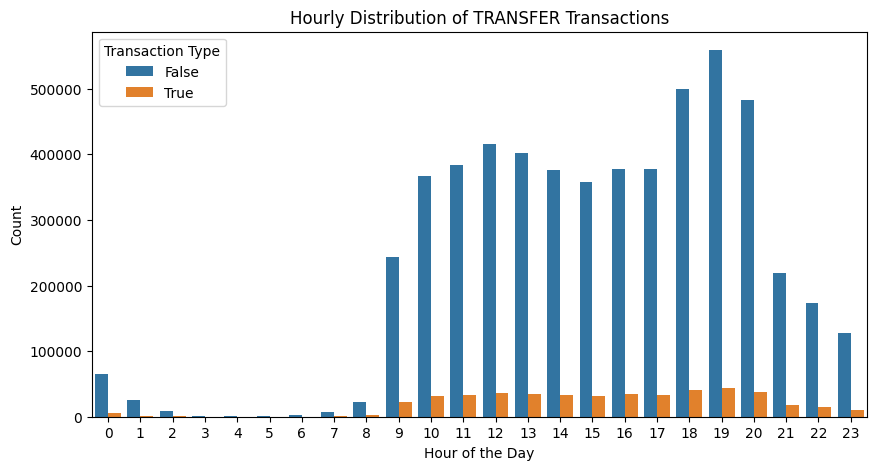

In [29]:
# Plotting the counts of each transaction type
plt.figure(figsize=(10, 5))
sns.countplot(data=df_synt, x='hour', hue='type_TRANSFER')
plt.title('Hourly Distribution of TRANSFER Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Transaction Type')
plt.show()

Peaks in transaction volume during certain hours may indicate periods of increased activity, which could be due to various factors such as end-of-day processing, scheduled batch transfers, or specific business operations.

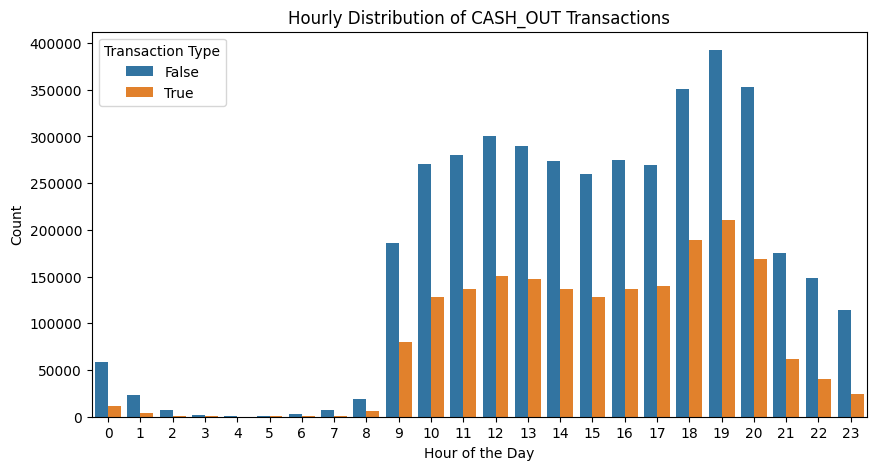

In [30]:
# Plotting the counts of each transaction type
plt.figure(figsize=(10, 5))
sns.countplot(data=df_synt, x='hour', hue='type_CASH_OUT')
plt.title('Hourly Distribution of CASH_OUT Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Transaction Type')
plt.show()

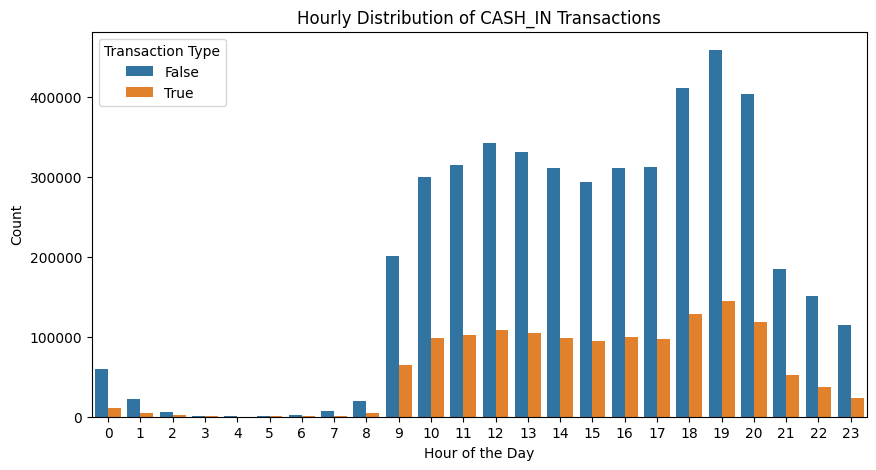

In [31]:
# Plotting the counts of each transaction type
plt.figure(figsize=(10, 5))
sns.countplot(data=df_synt, x='hour', hue='type_CASH_IN')
plt.title('Hourly Distribution of CASH_IN Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Transaction Type')
plt.show()

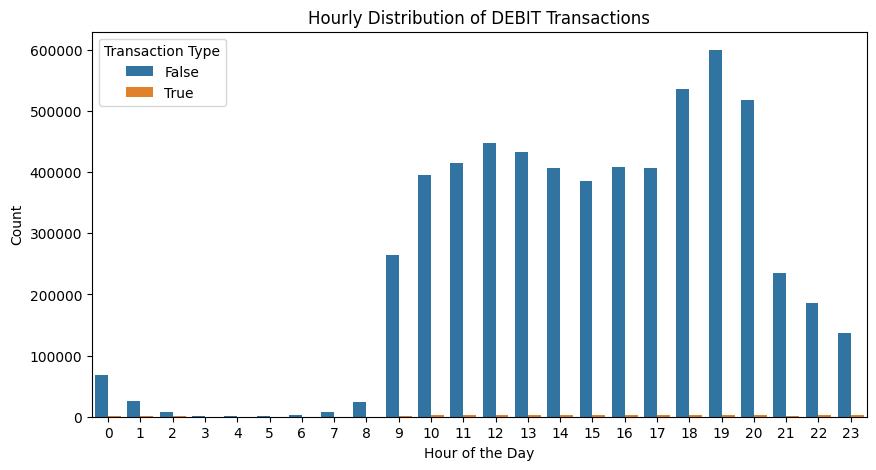

In [30]:
# Plotting the counts of each transaction type
plt.figure(figsize=(10, 5))
sns.countplot(data=df_synt, x='hour', hue='type_DEBIT')
plt.title('Hourly Distribution of DEBIT Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Transaction Type')
plt.show()

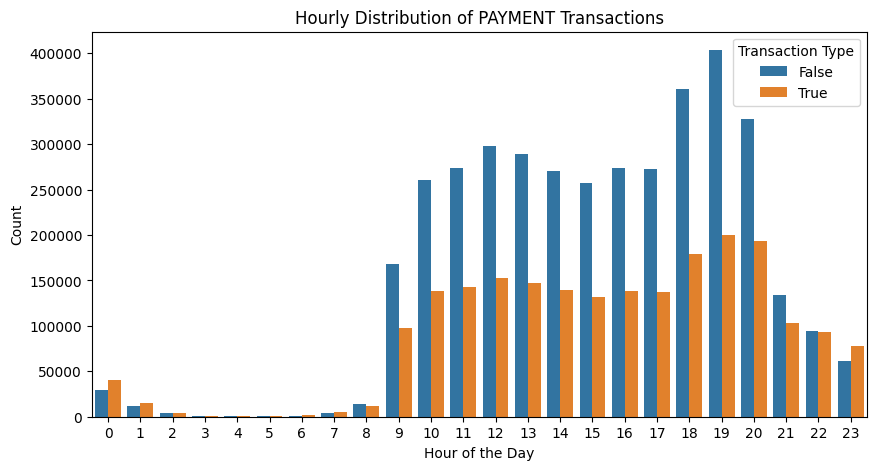

In [31]:
# Plotting the counts of each transaction type
plt.figure(figsize=(10, 5))
sns.countplot(data=df_synt, x='hour', hue='type_PAYMENT')
plt.title('Hourly Distribution of PAYMENT Transactions')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Transaction Type')
plt.show()

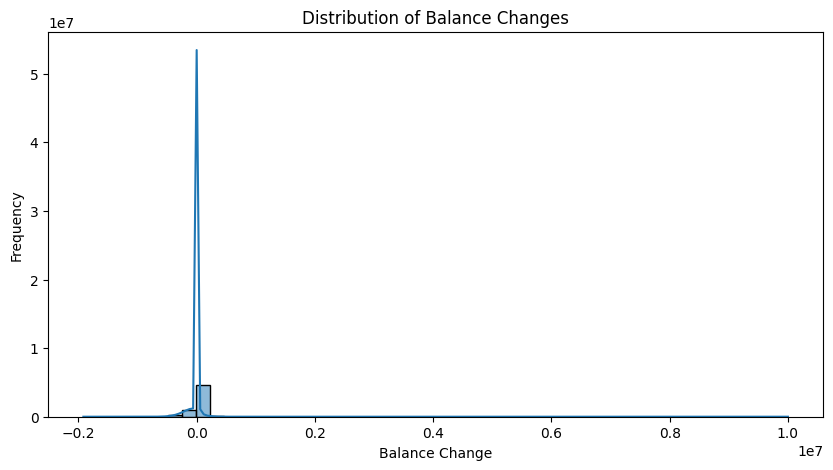

In [32]:
# Balance Change
plt.figure(figsize=(10, 5))
sns.histplot(df_synt['balance_delta'], bins=50, kde=True)
plt.title('Distribution of Balance Changes')
plt.xlabel('Balance Change')
plt.ylabel('Frequency')
plt.show()

Plot line charts to analyze hourly trends in transaction volume or fraud rates. This can help identify recurring patterns or anomalies over time.

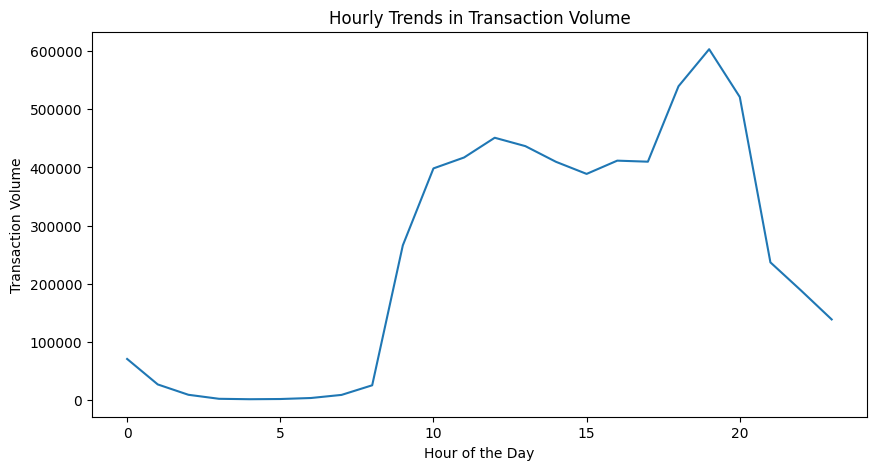

In [33]:
# Hourly Trends
hourly_transactions = df_synt.groupby('hour').size()
plt.figure(figsize=(10, 5))
hourly_transactions.plot(kind='line')
plt.title('Hourly Trends in Transaction Volume')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Volume')
plt.show()

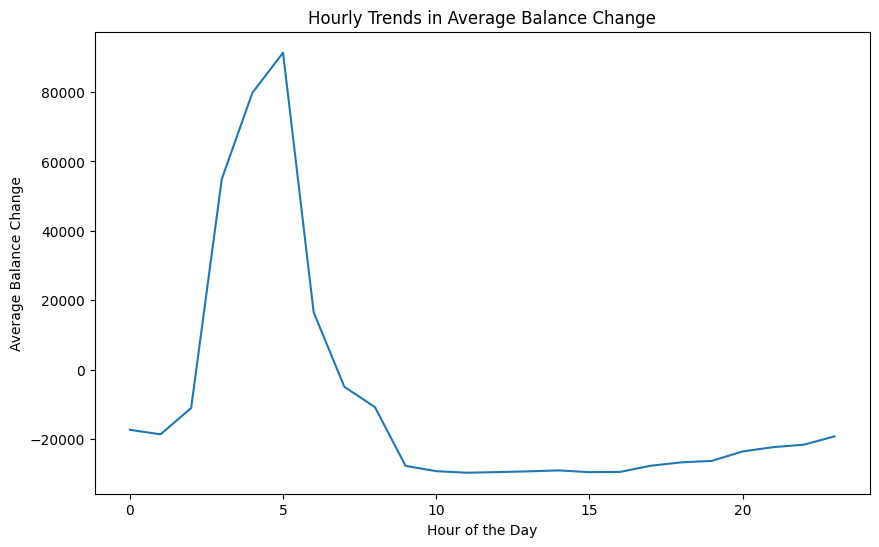

In [34]:
# Balance Evolution
plt.figure(figsize=(10, 6))
df_synt.groupby('hour')['balance_delta'].mean().plot(kind='line')
plt.title('Hourly Trends in Average Balance Change')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Balance Change')
plt.show()

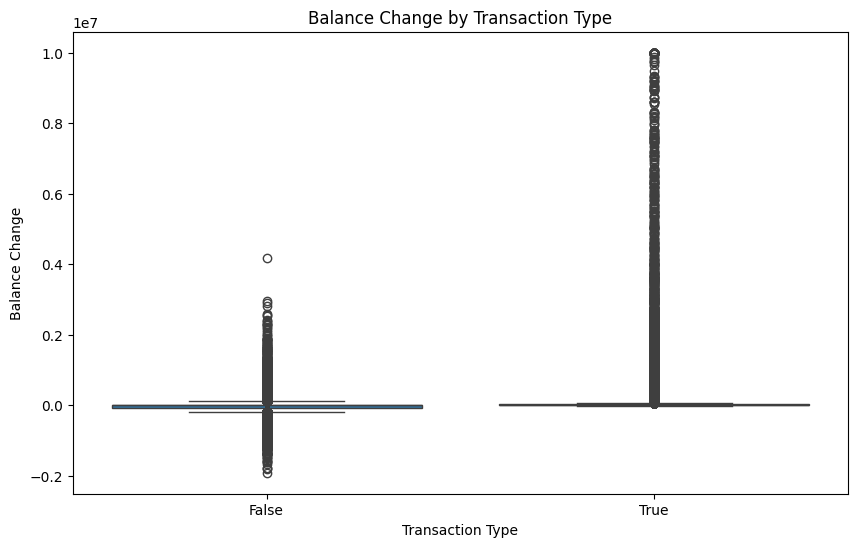

In [35]:
# Transaction Type vs. Balance Change
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_synt, x='type_CASH_OUT', y='balance_delta')
plt.title('Balance Change by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Balance Change')
plt.show()

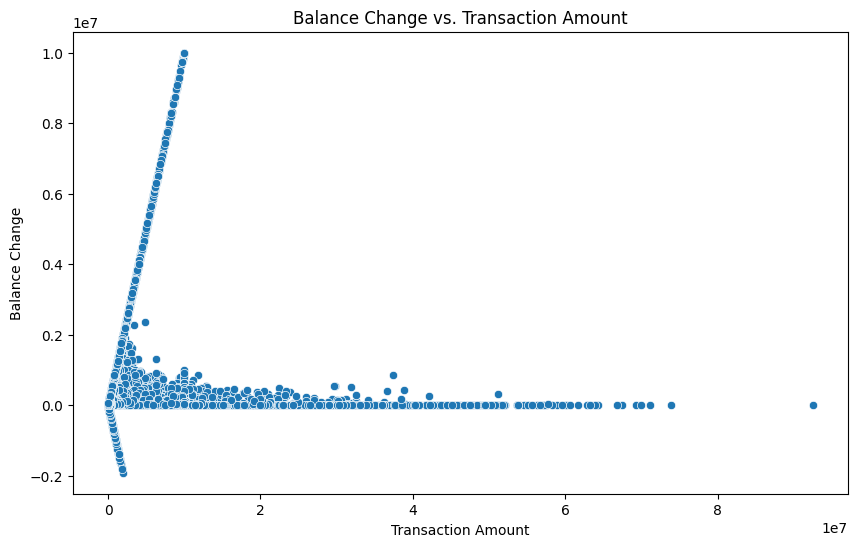

In [49]:
# Balance Change vs. Transaction Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_synt, x='amount', y='balance_delta')
plt.title('Balance Change vs. Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Balance Change')
plt.show()

Lines from 0 on the X-axis to 1.0 on the Y-axis and 0 to -0.2 on the Y-axis:

    These lines suggest a strong relationship or correlation between transaction amount and balance change for certain subsets of transactions.
    The line extending from 0 on the X-axis to 1.0 on the Y-axis indicates transactions where the entire transaction amount is reflected as a balance change of 1.0. This could be due to transactions such as deposits or transfers where the full transaction amount is added to the account balance.
    The line extending from 0 on the X-axis to -0.2 on the Y-axis suggests transactions where a portion of the transaction amount results in a balance decrease of approximately 0.2. This could be indicative of fees, charges, or deductions associated with the transaction.



#### Flag large transactions

In [31]:
df_synt["amount"].mean()

171499.8917925755

In [32]:
# Flag large transactions
df_synt['large_transaction'] = df_synt['amount'] > 200000

In [33]:
df_synt.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,balance_delta,large_transaction
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.0,C797688696,25176.67,283532.09,1,0,22,258355.42,True
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,22,63416.99,False
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0,23,1258818.82,True
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,23,6311409.28,True
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0,23,850002.52,True


In [36]:
# Save the df into a .csv file
df_synt.to_csv('./data/data.csv', index=False)

### Clustering

In [14]:
# Select numerical features for clustering
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [15]:
# Extract numerical data
X = df_synt[numerical_features]

In [16]:
# Split the dataset into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [17]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Scale the numerical features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [18]:
# Choose the number of clusters (you may need to experiment with this)
n_clusters = 5

# Initialise KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans to the scaled data
# kmeans.fit(X_scaled)
# Fit KMeans to the scaled training data
kmeans.fit(X_train_scaled)

# Predict cluster labels for both training and test sets
train_cluster_labels = kmeans.labels_
test_cluster_labels = kmeans.predict(X_test_scaled)

#### Cluster profiling
> To give insights into the typical behavior of transactions within each cluster.

In [19]:
# Calculate cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame to store cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numerical_features)

# Display cluster centers
print("Cluster Centers:")
print(cluster_centers_df)

Cluster Centers:
         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0  1.340254e+05   2.887556e+05    3.086778e+05    6.084182e+05    6.897717e+05
1  1.605864e+05   1.184450e+07    1.200495e+07    1.620614e+06    1.477174e+06
2  5.592231e+05   6.080645e+05    6.326662e+05    9.737493e+06    1.026663e+07
3  1.412005e+06   1.292065e+06    1.332572e+06    8.679893e+07    8.858479e+07
4  1.274452e+07   2.270519e+05   -4.190952e-09    1.829288e+07    3.510691e+07


#### Feature importance
> calculates the feature importance based on the absolute values of cluster centers in KMeans, providing insights into which features contribute most to cluster separation.

In [20]:
# Extract feature importances from KMeans
if hasattr(kmeans, 'cluster_centers_'):
    cluster_centers_abs = np.abs(cluster_centers)
    total_importance = cluster_centers_abs.sum(axis=1)
    feature_importance = total_importance / total_importance.sum()
    feature_importance_df = pd.DataFrame({'Feature': numerical_features, 'Importance': feature_importance})
    print("Feature Importance:")
    print(feature_importance_df)

Feature Importance:
          Feature  Importance
0          amount    0.006840
1   oldbalanceOrg    0.091354
2  newbalanceOrig    0.073480
3  oldbalanceDest    0.604652
4  newbalanceDest    0.223673


The feature importance analysis suggests that 'oldbalanceDest' contributes the most to cluster separation, followed by 'newbalanceOrig'. 'Amount' contributes the least to cluster separation.

#### Dimensionality Reduction (PCA)

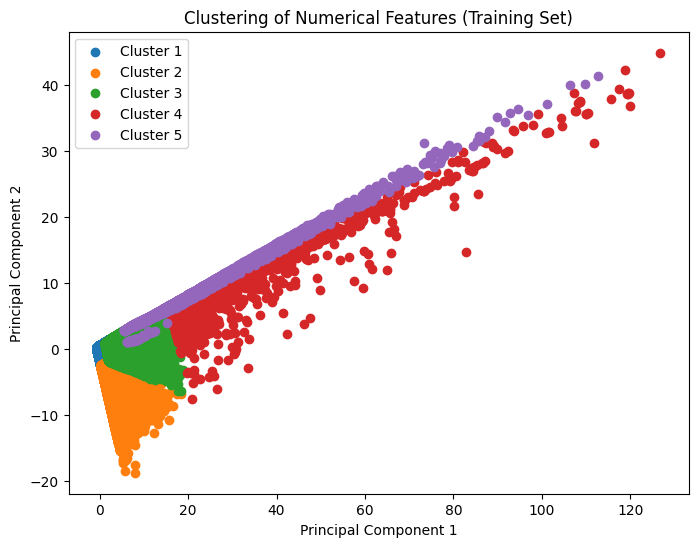

In [21]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot clusters for the training set
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X_train_pca[train_cluster_labels == i, 0], X_train_pca[train_cluster_labels == i, 1], label=f'Cluster {i+1}')
plt.title('Clustering of Numerical Features (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [22]:
# Create a DataFrame to store PCA results for the training set
train_pca_df = pd.DataFrame(data=X_train_pca, columns=['Principal Component 1', 'Principal Component 2'])
train_pca_df['Cluster'] = train_cluster_labels

#### Anomaly Detection Within Clusters
> After identifying the clusters, apply anomaly detection techniques within each cluster to identify any unusual transactions.

In [70]:
# anomaly_labels = np.zeros(len(X_scaled), dtype=int)
# anomaly_scores = np.zeros(len(X_scaled))

# for cluster_label in range(n_clusters):
#     cluster_indices = np.where(cluster_labels == cluster_label)[0]
#     X_cluster = X_scaled[cluster_indices]
    
#     isolation_forest = IsolationForest(contamination='auto', random_state=42)
#     isolation_forest.fit(X_cluster)
    
#     scores = isolation_forest.decision_function(X_cluster)
#     anomalies = isolation_forest.predict(X_cluster) == -1
    
#     anomaly_labels[cluster_indices] = anomalies
#     anomaly_scores[cluster_indices] = scores

# # Print the number of anomalies detected in each cluster
# for cluster_label in range(n_clusters):
#     num_anomalies = np.sum(anomaly_labels[cluster_labels == cluster_label])
#     print(f"Cluster {cluster_label}: {num_anomalies} anomalies")

# # Add anomaly labels to the original DataFrame and PCA DataFrame
# df_synt['Anomaly'] = anomaly_labels
# pca_df['Anomaly'] = anomaly_labels

In [23]:
# Anomaly detection with Isolation Forest on the training set
anomaly_labels = np.zeros(len(X_train_scaled), dtype=int)
anomaly_scores = np.zeros(len(X_train_scaled))

for cluster_label in range(n_clusters):
    cluster_indices = np.where(train_cluster_labels == cluster_label)[0]
    X_cluster = X_train_scaled[cluster_indices]
    
    isolation_forest = IsolationForest(contamination='auto', random_state=42)
    isolation_forest.fit(X_cluster)
    
    scores = isolation_forest.decision_function(X_cluster)
    anomalies = isolation_forest.predict(X_cluster) == -1
    
    anomaly_labels[cluster_indices] = anomalies
    anomaly_scores[cluster_indices] = scores

# Print the number of anomalies detected in each cluster
for cluster_label in range(n_clusters):
    num_anomalies = np.sum(anomaly_labels[train_cluster_labels == cluster_label])
    print(f"Cluster {cluster_label}: {num_anomalies} anomalies")

# Add anomaly labels to the original DataFrame and PCA DataFrame
df_synt['Anomaly'] = np.concatenate([anomaly_labels, np.zeros(len(X_test_scaled), dtype=int)])  # Combine with zeros for test set
train_pca_df['Anomaly'] = anomaly_labels

Cluster 0: 668858 anomalies
Cluster 1: 47533 anomalies
Cluster 2: 38168 anomalies
Cluster 3: 324 anomalies
Cluster 4: 644 anomalies


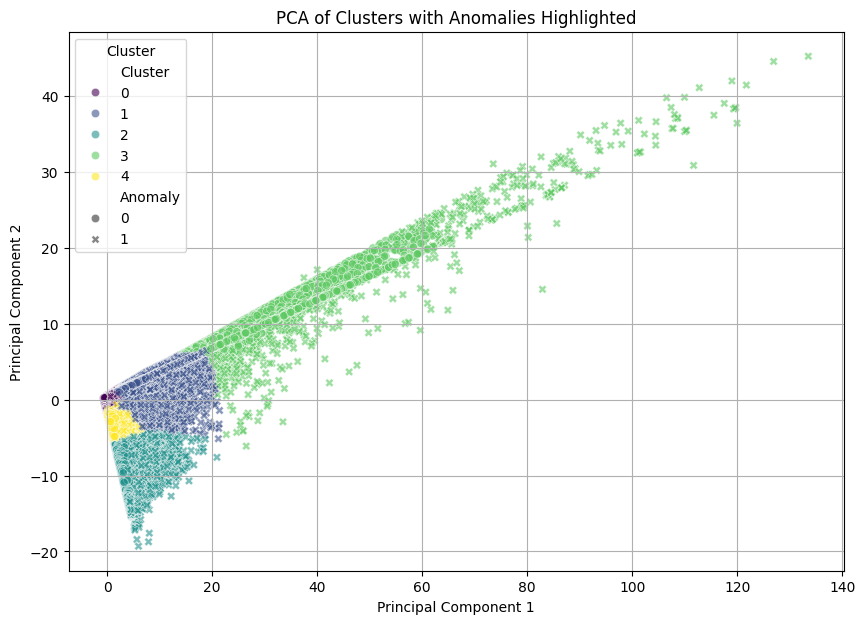

In [46]:
# Plot PCA with anomalies highlighted
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', data=pca_df, alpha=0.6, style=pca_df['Anomaly'], markers={0: 'o', 1: 'X'})
plt.title('PCA of Clusters with Anomalies Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# # Select features for anomaly detection
# features = ['step', 'amount', 'isFlaggedFraud', 'balance_diff_orig', 'balance_diff_dest', 'large_transaction']

# # Split data into training and testing sets
# X_train, X_test = train_test_split(df_synt[features], test_size=0.2, random_state=42)

In [ ]:
# # Predict anomalies on testing data
# y_pred = isolation_forest.predict(X_test)

# # Convert predictions to binary labels (1 for normal, -1 for anomaly)
# y_pred_binary = [1 if pred == 1 else -1 for pred in y_pred]

# # Calculate number of anomalies detected
# num_anomalies = sum(1 for pred in y_pred_binary if pred == -1)
# total_samples = len(X_test)
# anomaly_percentage = num_anomalies / total_samples * 100

# print(f"Number of anomalies detected: {num_anomalies}/{total_samples} ({anomaly_percentage:.2f}%)")

#### Evaluate

In [27]:
# Evaluate clustering performance using silhouette score
# silhouette_avg = silhouette_score(X_scaled, cluster_labels)
# print(f"Silhouette Score: {silhouette_avg}")

In [43]:
# df_synt.head()

In [25]:
true_labels = df_synt['isFraud']
predicted_labels = df_synt['Anomaly']

# Calculate precision
precision = precision_score(true_labels, predicted_labels)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)

precision_rounded = round(precision, 4)
recall_rounded = round(recall, 4)
f1_rounded = round(f1, 4)

print(f"Precision: {precision_rounded}")
print(f"Recall: {recall_rounded}")
print(f"F1 Score: {f1_rounded}")


Precision: 0.0003
Recall: 0.0832
F1 Score: 0.0006


- Precision: The precision is extremely low at approximately 0.0003, which means that out of all the instances predicted as anomalies, almost none of them are actual fraud cases.
- Recall: The recall is slightly better at approximately 0.083, indicating that the model is able to identify about 8.3% of the actual fraud cases.
- F1 Score: The F1 score, which is the harmonic mean of precision and recall, is very low as well, indicating a poor balance between precision and recall.

In [26]:
# Apply label encoding for high cardinality columns
label_encoder = LabelEncoder()
for col in ['nameOrig', 'nameDest']:
    df_synt[col] = label_encoder.fit_transform(df_synt[col])

In [77]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer

# # List all column names except 'isFraud' which is the target column
# features = [col for col in df_synt.columns if col != 'isFraud']

# # Ensure these features exist in your dataframe
# print("Features used for training:", features)
# print("All columns in the dataframe:", df_synt.columns)

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_samples': ['auto', 0.5, 0.75],
#     'contamination': [0.1, 0.2, 0.3],
#     'max_features': [1.0, 0.5, 0.75]
# }

# # Create a custom scorer using F1 score
# f1_scorer = make_scorer(f1_score, pos_label=1)

# # Initialise the Isolation Forest
# isolation_forest = IsolationForest(random_state=42)

# # Perform grid search
# grid_search = GridSearchCV(estimator=isolation_forest, param_grid=param_grid, scoring=f1_scorer, cv=3)
# grid_search.fit(df_synt[features], df_synt['isFraud'])

# # Get the best estimator
# best_isolation_forest = grid_search.best_estimator_

# # Predict using the best estimator
# df_synt['Anomaly'] = best_isolation_forest.predict(df_synt[features])
# df_synt['Anomaly'] = df_synt['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

# # Calculate the metrics
# precision = precision_score(df_synt['isFraud'], df_synt['Anomaly'])
# recall = recall_score(df_synt['isFraud'], df_synt['Anomaly'])
# f1 = f1_score(df_synt['isFraud'], df_synt['Anomaly'])

# # Print the results
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")

Features used for training: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'hour', 'balance_delta', 'large_transaction', 'Anomaly']
All columns in the dataframe: Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'hour', 'balance_delta', 'large_transaction',
       'Anomaly'],
      dtype='object')


ValueError: 
All the 243 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_iforest.py", line 285, in fit
    X = self._validate_data(X, accept_sparse=["csc"], dtype=tree_dtype)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 921, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\managers.py", line 451, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\astype.py", line 187, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\astype.py", line 138, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'CASH_IN'

--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_iforest.py", line 285, in fit
    X = self._validate_data(X, accept_sparse=["csc"], dtype=tree_dtype)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py", line 921, in check_array
    array = array.astype(new_dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\managers.py", line 451, in astype
    return self.apply(
           ^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\astype.py", line 187, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\deyna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\dtypes\astype.py", line 138, in _astype_nansafe
    return arr.astype(dtype, copy=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'PAYMENT'


In [27]:
non_numerical_columns = df_synt.select_dtypes(include=['object']).columns
print("Non-numerical columns:", non_numerical_columns)

Non-numerical columns: Index(['type'], dtype='object')


In [28]:
cardinality = df_synt[non_numerical_columns].nunique()
print("Cardinality of non-numerical columns:", cardinality)

Cardinality of non-numerical columns: type    5
dtype: int64


In [81]:
# Apply label encoding for high cardinality columns
label_encoder = LabelEncoder()
for col in ['nameOrig', 'nameDest']:
    df_synt[col] = label_encoder.fit_transform(df_synt[col])

# Investigate the transactions during the peak hour
peak_hour = hourly_transactions['hour'].idxmax()
peak_hour_transactions = hourly_transactions[hourly_transactions['hour'] == peak_hour]
print("Peak Hour Transactions:")
print(peak_hour_transactions.head())

Peak Hour Transactions:
Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud, hour, balance_delta, large_transaction, Anomaly]
Index: []


In [82]:
# Plot PCA with anomalies highlighted
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', data=pca_df, alpha=0.6, style=pca_df['Anomaly'], markers={0: 'o', 1: 'X'})
plt.title('PCA of Clusters with Anomalies Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# ROC-AUC Score
roc_auc = roc_auc_score(true_labels, predicted_labels)
print("ROC-AUC Score:", roc_auc)

# Classification Report
report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

Confusion Matrix:
[[5204346  755290]
 [   2610     237]]
ROC-AUC Score: 0.4782556356945446
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93   5959636
           1       0.00      0.08      0.00      2847

    accuracy                           0.87   5962483
   macro avg       0.50      0.48      0.47   5962483
weighted avg       1.00      0.87      0.93   5962483



True Negatives (TN): 5,204,346
False Positives (FP): 755,290
False Negatives (FN): 2,610
True Positives (TP): 237

ROC-AUC (Receiver Operating Characteristic - Area Under Curve) is a metric that evaluates the performance of a binary classification model.
It measures the ability of the model to distinguish between the positive and negative classes.
A score of 0.478 suggests that the model's ability to discriminate between positive and negative classes is poor, as the score is close to random guessing.

The classification report provides precision, recall, F1-score, and support for each class (0 and 1).
Precision: The proportion of true positive predictions among all positive predictions made by the model.
Recall: The proportion of true positive predictions among all actual positive instances in the data.
F1-score: The harmonic mean of precision and recall, providing a balance between the two metrics.

For class 0 (negative class): High precision (1.00) and recall (0.87), indicating that the model performs well in identifying true negatives.
For class 1 (positive class): Very low precision (0.00) and recall (0.08), indicating poor performance in identifying true positives.

In [36]:
# Check if any test data is being used in the training process
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (4769986, 5)
Testing Data Shape: (1192497, 5)


In [44]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_samples': ['auto', 0.5, 0.75],
#     'contamination': [0.1, 0.2, 0.3],
#     'max_features': [1.0, 0.5, 0.75]
# }

In [45]:
# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(estimator=isolation_forest, param_grid=param_grid, scoring='f1', cv=3)

In [46]:
# grid_search.fit(X_train, y_train)

In [52]:
from sklearn.model_selection import train_test_split

# Assuming 'features' contains your feature columns and 'target' contains your target column
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Assuming 'target' contains your target column
y_train = df_synt.loc[X_train.index]['isFraud']
y_test = df_synt.loc[X_test.index]['isFraud']

In [54]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

# Define oversampling and undersampling strategies
oversampler = RandomOverSampler(sampling_strategy=0.5)  # Increase the minority class to 50% of the majority
undersampler = RandomUnderSampler(sampling_strategy=0.8) # Reduce the majority class to 80% of its original size

# Perform oversampling
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# Perform undersampling
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Initialize and train a model on the original data
model_original = RandomForestClassifier(random_state=42)
model_original.fit(X_train, y_train)

# Initialize and train a model on the oversampled data
model_oversampled = RandomForestClassifier(random_state=42)
model_oversampled.fit(X_train_over, y_train_over)

# Initialize and train a model on the undersampled data
model_undersampled = RandomForestClassifier(random_state=42)
model_undersampled.fit(X_train_under, y_train_under)

# Evaluate models on the original test set
print("Original Model Performance:")
print(classification_report(y_test, model_original.predict(X_test)))

# Evaluate models on the oversampled test set
print("Oversampled Model Performance:")
print(classification_report(y_test, model_oversampled.predict(X_test)))

# Evaluate models on the undersampled test set
print("Undersampled Model Performance:")
print(classification_report(y_test, model_undersampled.predict(X_test)))

Original Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1191933
           1       0.91      0.49      0.63       564

    accuracy                           1.00   1192497
   macro avg       0.95      0.74      0.82   1192497
weighted avg       1.00      1.00      1.00   1192497

Oversampled Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1191933
           1       0.82      0.58      0.68       564

    accuracy                           1.00   1192497
   macro avg       0.91      0.79      0.84   1192497
weighted avg       1.00      1.00      1.00   1192497

Undersampled Model Performance:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   1191933
           1       0.03      0.99      0.06       564

    accuracy                           0.99   1192497
   macro avg       0.52      0.99    

Original Model Performance:

    Precision for class 1 (fraud): 0.91
    Recall for class 1 (fraud): 0.49
    F1-score for class 1 (fraud): 0.63
    Accuracy: 1.00

The original model performs very well for class 0 (non-fraud) but has low recall for class 1 (fraud), meaning it misses a lot of fraudulent transactions.

Oversampled Model Performance:

    Precision for class 1 (fraud): 0.82
    Recall for class 1 (fraud): 0.58
    F1-score for class 1 (fraud): 0.68
    Accuracy: 1.00

Oversampling the minority class improved the recall for class 1, meaning it catches more fraudulent transactions, though at a slight cost to precision.

Undersampled Model Performance:

    Precision for class 1 (fraud): 0.03
    Recall for class 1 (fraud): 0.99
    F1-score for class 1 (fraud): 0.06
    Accuracy: 0.99

Undersampling the majority class significantly improved the recall for class 1, but precision dropped drastically. This means the model now catches nearly all fraudulent transactions but also misclassifies many non-fraudulent transactions as fraud.

Try out Hybrid resampling and hyperparameter tuning.

Hybrid resampling: Combine both oversampling and undersampling to balance the dataset more effectively.

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Extract features and target
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = df_synt[features]
y = df_synt['isFraud']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define oversampling and undersampling strategies
oversampler = RandomOverSampler(sampling_strategy=0.5)  # Increase the minority class to 50% of the majority
undersampler = RandomUnderSampler(sampling_strategy=0.8) # Reduce the majority class to 80% of its original size

# Create a pipeline with scaling, resampling, and a classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('oversample', oversampler),
    ('undersample', undersampler),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100],  # Reduce the number of estimators for quicker results
    'classifier__max_depth': [10, 20],      # Limit max depth
    'classifier__min_samples_split': [2, 5] # Limit min samples split
}

# Perform grid search with a smaller subset for quicker results
subset_size = 100000  # Adjust subset size 
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=subset_size, stratify=y_train, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_subset, y_train_subset)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("Best Model Performance:")
print(classification_report(y_test, y_pred))

# Print confusion matrix and ROC-AUC score
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("ROC-AUC Score:", round(roc_auc, 2))

Best Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1191933
           1       0.54      0.37      0.44       564

    accuracy                           1.00   1192497
   macro avg       0.77      0.69      0.72   1192497
weighted avg       1.00      1.00      1.00   1192497

Confusion Matrix:
[[1191755     178]
 [    355     209]]
ROC-AUC Score: 0.69


The new results show a significant improvement in the detection of fraudulent transactions, with better precision and recall for the minority class. However, the recall is still relatively low, indicating that the model misses a substantial number of fraudulent transactions.

#### Further analysis

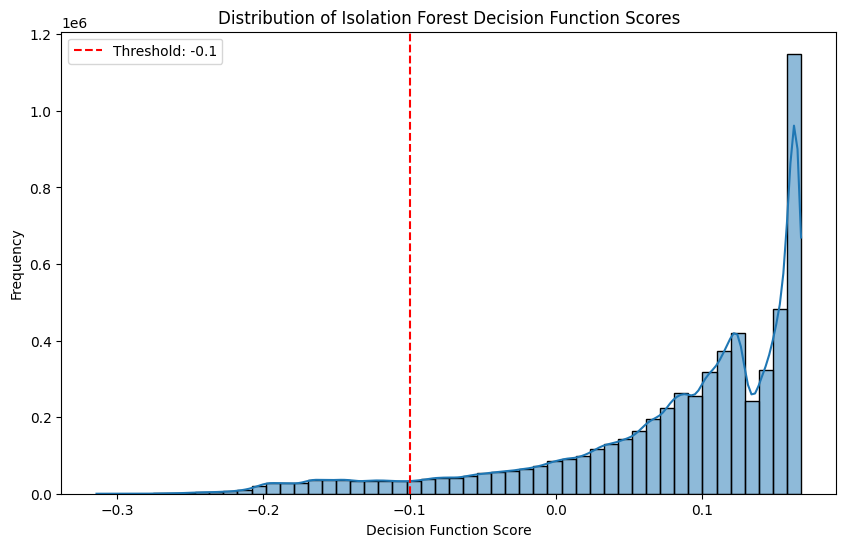

In [49]:
# Analyse anomaly scores
plt.figure(figsize=(10, 6))
sns.histplot(anomaly_scores, bins=50, kde=True)
plt.axvline(x=-0.1, color='red', linestyle='--', label='Threshold: -0.1')
plt.title('Distribution of Isolation Forest Decision Function Scores')
plt.xlabel('Decision Function Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [50]:
# Test different thresholds
thresholds = [-0.5, -0.3, -0.1, 0, 0.1]
for threshold in thresholds:
    anomaly_counts = np.sum(anomaly_scores < threshold)
    print(f"Threshold: {threshold}")
    print(f"Anomalies: {anomaly_counts}")
    print()

Threshold: -0.5
Anomalies: 0

Threshold: -0.3
Anomalies: 22

Threshold: -0.1
Anomalies: 383127

Threshold: 0
Anomalies: 937653

Threshold: 0.1
Anomalies: 2648446



       amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0  1505626.01           0.00   -1.164153e-10        29031.00      5515763.34
1     3428.95      147798.00    1.443691e+05      1534657.01      5515763.34
2     3852.64     1449076.27    1.445224e+06            0.00            0.00
3     7870.29     1445223.63    1.437353e+06            0.00            0.00
4  1349670.68           0.00   -1.164153e-10      1538085.96      5515763.34


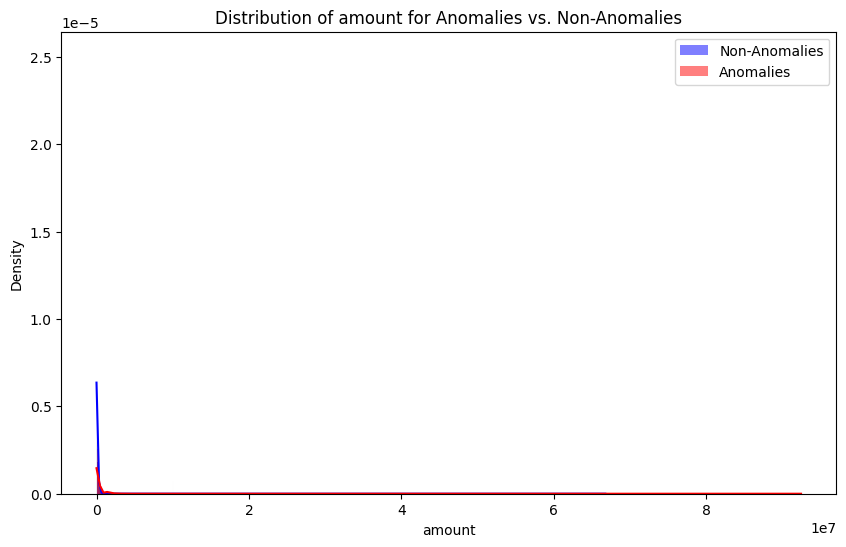

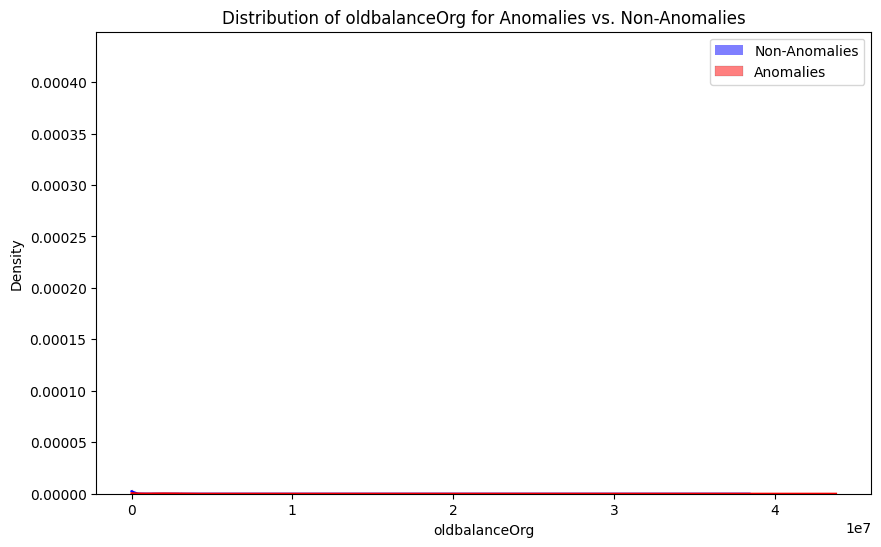

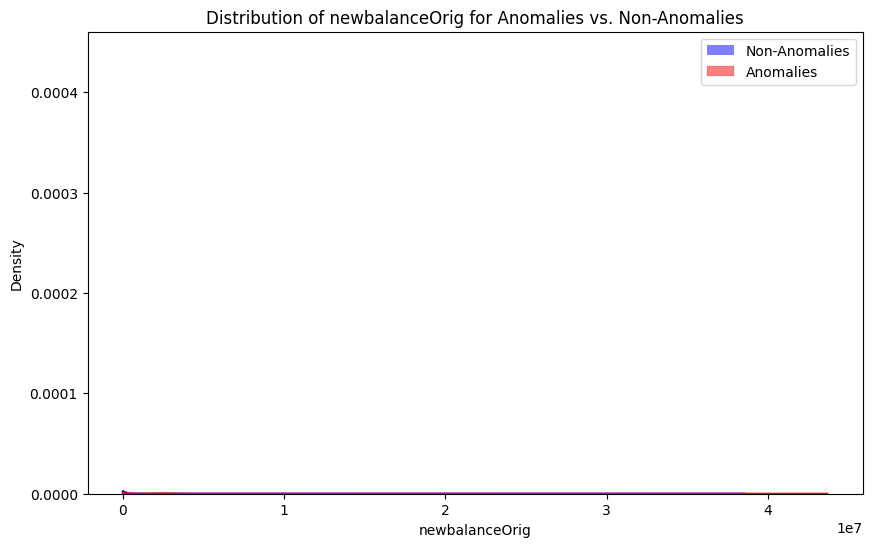

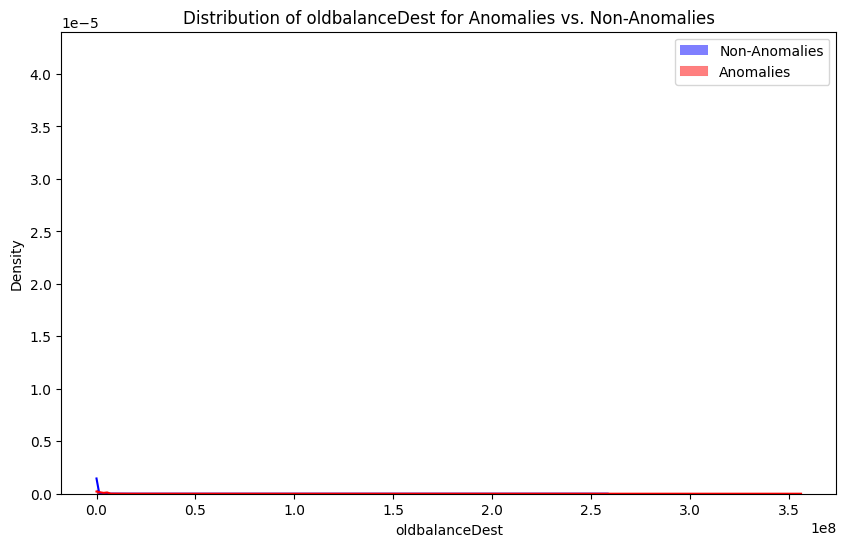

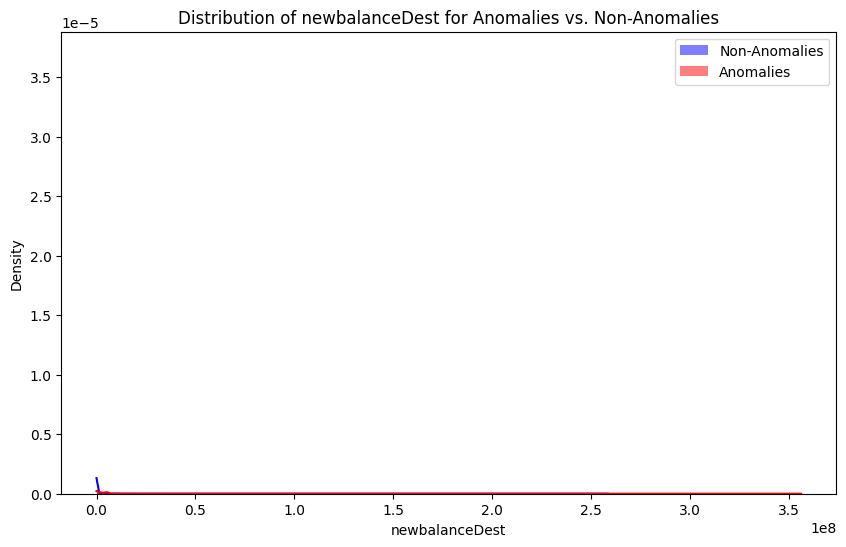

In [55]:
# Select a threshold and identify anomalies
anom_threshold = -0.1
anomalies = anomaly_scores < anom_threshold

# Extract anomalies
anomalies_df = pd.DataFrame(scaler.inverse_transform(X_scaled[anomalies]), columns=numerical_features)

# Print the first few anomalies for review
print(anomalies_df.head())

# Add a column to the original DataFrame to indicate whether a row is an anomaly
df_synt['isAnomaly'] = False
df_synt.loc[anomalies, 'isAnomaly'] = True

# Compare feature distributions
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_synt[df_synt['isAnomaly'] == False][feature], color='blue', label='Non-Anomalies', kde=True, stat='density')
    sns.histplot(df_synt[df_synt['isAnomaly'] == True][feature], color='red', label='Anomalies', kde=True, stat='density')
    plt.title(f'Distribution of {feature} for Anomalies vs. Non-Anomalies')
    plt.legend()
    plt.show()


In [57]:
df_synt.tail()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balance_delta,large_transaction,Anomaly,isAnomaly
6362609,742,258355.42,C1113162093,258355.42,0.0,C797688696,25176.67,283532.09,1,0,22,False,True,False,False,False,258355.42,True,0,False
6362611,742,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0,22,False,True,False,False,False,63416.99,False,0,False
6362613,743,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0,23,False,True,False,False,False,1258818.82,True,1,True
6362617,743,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,23,False,True,False,False,False,6311409.28,True,1,True
6362619,743,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0,23,False,True,False,False,False,850002.52,True,0,False


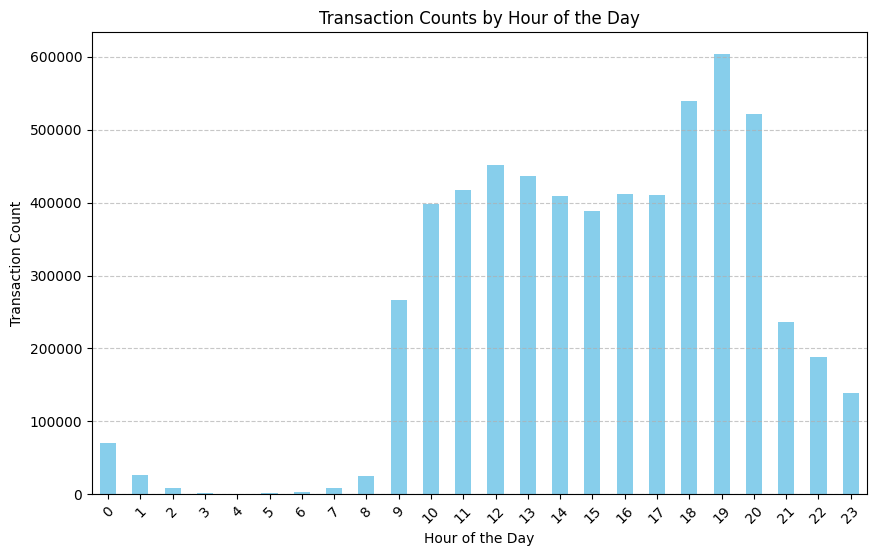

In [51]:
# Aggregate transaction counts by hour
transaction_counts_by_hour = df_synt.groupby('hour').size()

# Visualize transaction counts by hour
plt.figure(figsize=(10, 6))
transaction_counts_by_hour.plot(kind='bar', color='skyblue')
plt.title('Transaction Counts by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [52]:
# Filter transactions between hours 10 and 20
hourly_transactions = df_synt[(df_synt['hour'] >= 10) & (df_synt['hour'] <= 20)]

# Group transactions by hour and transaction type
hourly_transaction_counts = hourly_transactions.groupby(['hour', 'type']).size().unstack(fill_value=0)

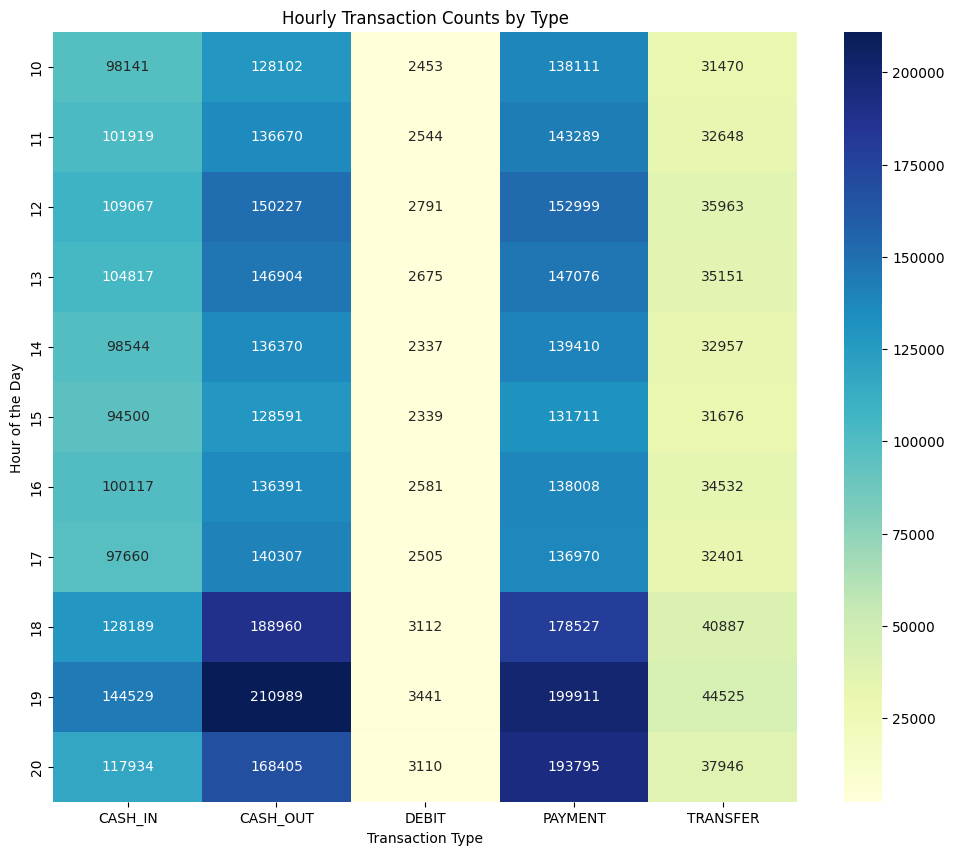

In [53]:
# Plot transaction counts by hour and type
plt.figure(figsize=(12, 10))
sns.heatmap(hourly_transaction_counts, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Hourly Transaction Counts by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Hour of the Day')
plt.show()

In [ ]:
# Check for the peak hour
peak_hour = hourly_transaction_counts.sum(axis=1).idxmax()
print(f"The peak hour of transaction volume is {peak_hour}")

The peak hour of transaction volume is (19, False, True, False, False)


In [ ]:
# Investigate the transactions during the peak hour
peak_hour_transactions = hourly_transactions[hourly_transactions['hour'] == peak_hour]
print("Peak Hour Transactions:")
print(peak_hour_transactions.head())

ValueError: operands could not be broadcast together with shapes (4987184,) (5,) 

#### Comparison

In [42]:
# Filter cluster labels based on the indices present in fraudulent_transactions
fraudulent_clusters = cluster_labels[df_synt.index.isin(fraudulent_transactions.index)]

# Compare distribution of fraudulent transactions across clusters
fraudulent_cluster_counts = np.bincount(fraudulent_clusters)

print("Fraudulent Transactions Distribution Across Clusters:")
print(fraudulent_cluster_counts)

Fraudulent Transactions Distribution Across Clusters:
[2291  554    0    2]


It appears that there are fraudulent transactions distributed across the clusters, with the majority concentrated in clusters 0 and 1. However, it seems like clusters 2 and 3 have no fraudulent transactions, while only a few are present in cluster 4.

This distribution suggests that clusters 0 and 1 may contain transaction patterns that are more indicative of fraudulent behavior, while clusters 2 and 3 may represent more typical or legitimate transaction patterns.

#### Visualising 
> understand their distribution and separation

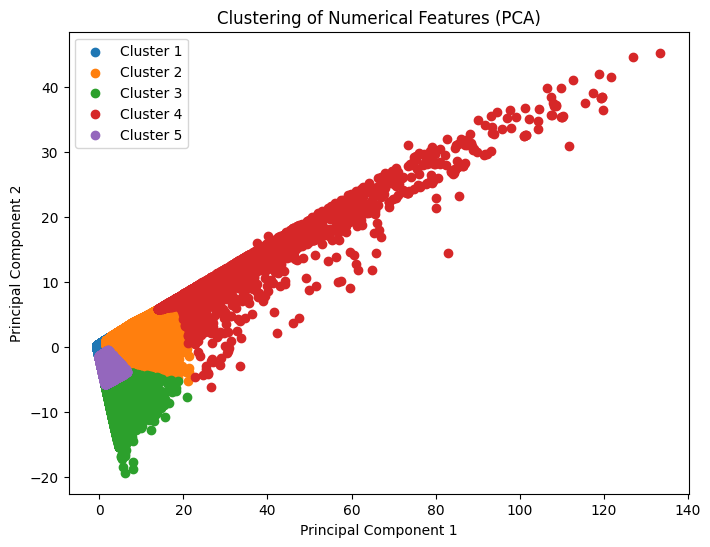

In [44]:
# Plot clusters in 2D PCA space
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(X_pca[cluster_labels == i, 0], X_pca[cluster_labels == i, 1], label=f'Cluster {i+1}')
plt.title('Clustering of Numerical Features (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

The first principal component (PC1) explains the most variance in the data, and the second principal component (PC2) explains the second most variance.

Cluster 4 is distributed over a range of values in both PC1 and PC2. It indicates that transactions in Cluster 4 have variability in the characteristics that contribute to these principal components. For example, a wide spread along PC1 might indicate high variability in transaction amounts or balances.


In [45]:
# Calculate cluster sizes
cluster_sizes = np.bincount(cluster_labels)

# Explore cluster characteristics (e.g., mean transaction amounts)
cluster_characteristics = {}
for cluster_label in range(n_clusters):
    cluster_indices = (cluster_labels == cluster_label)
    cluster_data = X[cluster_indices]
    cluster_mean = cluster_data.mean(axis=0)
    cluster_characteristics[cluster_label] = cluster_mean

# Print cluster characteristics
for cluster_label, characteristics in cluster_characteristics.items():
    print(f"Cluster {cluster_label} Characteristics:")
    print(characteristics)

Cluster 0 Characteristics:
amount            133680.809607
oldbalanceOrg     156240.710303
newbalanceOrig    171929.544417
oldbalanceDest    621305.959244
newbalanceDest    710228.636270
dtype: float64
Cluster 1 Characteristics:
amount            7.530920e+05
oldbalanceOrg     5.071429e+05
newbalanceOrig    5.204570e+05
oldbalanceDest    1.043165e+07
newbalanceDest    1.122633e+07
dtype: float64
Cluster 2 Characteristics:
amount            1.576087e+05
oldbalanceOrg     1.938963e+07
newbalanceOrig    1.954700e+07
oldbalanceDest    1.836428e+06
newbalanceDest    1.695627e+06
dtype: float64
Cluster 3 Characteristics:
amount            1.074273e+07
oldbalanceOrg     5.686310e+05
newbalanceOrig    5.777674e+05
oldbalanceDest    6.373364e+07
newbalanceDest    7.698808e+07
dtype: float64
Cluster 4 Characteristics:
amount            1.628167e+05
oldbalanceOrg     6.907723e+06
newbalanceOrig    7.070328e+06
oldbalanceDest    1.504277e+06
newbalanceDest    1.357919e+06
dtype: float64


Insights:

- Cluster 3 stands out with significantly high transaction amounts and balances in both destination accounts ('oldbalanceDest' and 'newbalanceDest'). This cluster may represent large-scale transactions or transfers.
- Cluster 1 also exhibits high transaction amounts and balances, indicating potential high-value transactions.
- Clusters 0, 2, and 4 have more moderate transaction characteristics, with varying balances and amounts.

Cluster 0: 798166 anomalies
Cluster 1: 38143 anomalies
Cluster 2: 15107 anomalies
Cluster 3: 615 anomalies
Cluster 4: 85622 anomalies


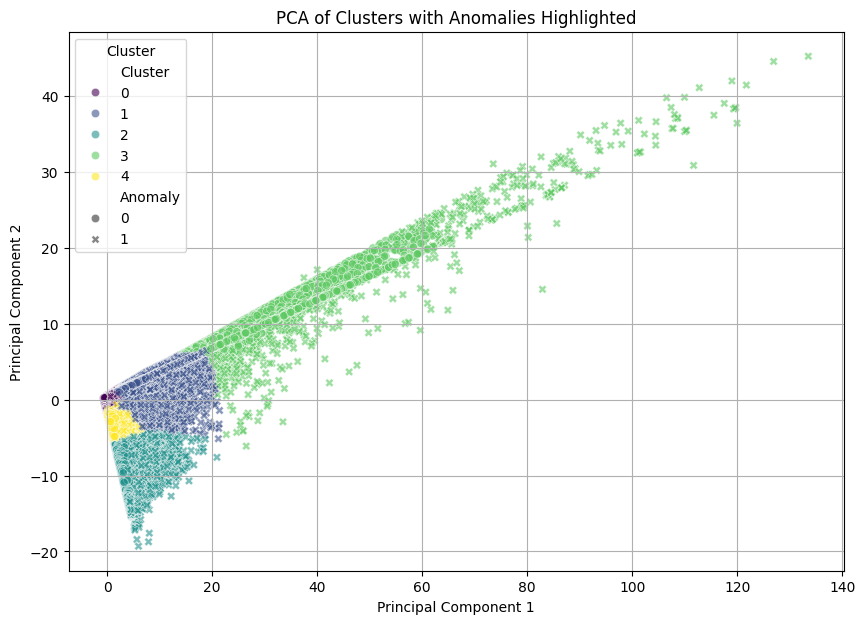

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = cluster_labels

# Apply Isolation Forest for anomaly detection within each cluster
anomaly_labels = np.zeros(len(X_scaled), dtype=int)  # 0 for normal, 1 for anomaly
anomaly_scores = np.zeros(len(X_scaled))

for cluster_label in range(n_clusters):
    # Extract data points in the current cluster
    cluster_indices = np.where(cluster_labels == cluster_label)[0]
    X_cluster = X_scaled[cluster_indices]
    
    # Initialize and fit Isolation Forest
    isolation_forest = IsolationForest(contamination='auto', random_state=42)
    isolation_forest.fit(X_cluster)
    
    # Compute anomaly scores (negative values indicate anomalies)
    scores = isolation_forest.decision_function(X_cluster)
    anomalies = isolation_forest.predict(X_cluster) == -1  # -1 indicates anomaly
    
    # Store the results
    anomaly_labels[cluster_indices] = anomalies
    anomaly_scores[cluster_indices] = scores

# Print the number of anomalies detected in each cluster
for cluster_label in range(n_clusters):
    num_anomalies = np.sum(anomaly_labels[cluster_labels == cluster_label])
    print(f"Cluster {cluster_label}: {num_anomalies} anomalies")

# Add anomaly labels to the original DataFrame
df_synt['Anomaly'] = anomaly_labels

# Add anomaly labels to PCA DataFrame
pca_df['Anomaly'] = anomaly_labels

# Plot PCA with anomalies highlighted
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', data=pca_df, alpha=0.6, style=pca_df['Anomaly'], markers={0: 'o', 1: 'X'})
plt.title('PCA of Clusters with Anomalies Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()